In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
plt.rcParams.update({
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.titlesize": 16
})

 # Configuration

In [3]:
# ========================================
# BACKGROUND CATEGORY TOGGLE
# ========================================
USE_4_CATEGORIES = False  # Set to True for 4 categories (split NaN), False for 3 categories (NaN in Comb)

In [4]:
# Define decay modes, trees, and cuts
decay_config = {
    'kmpip': {
        'ds_tree': 'DstreeCh1',
        'cut': "(-0.014291 <= D0_dM) & (D0_dM <= 0.014152)"
    },
    'km3pi': {
        'ds_tree': 'DstreeCh3',
        'cut': "(-0.013093 <= D0_dM) & (D0_dM <= 0.012520)"
    },
    'kmpippi0_eff20_May2020': {
        'ds_tree': 'DstreeCh2',
        'cut': "(-0.052152 <= D0_dM) & (D0_dM <= 0.024237)"
    }
}

# Background samples
background_samples = ["ccbar", "charged", "ddbar", "mixed", "ssbar", "uubar"]

 # Prep-Work

 ### Import Data

In [5]:
DataFrames = {}  # define empty dictionary to hold dataframes

# Load Signal files
print("Loading Signal files...")
for mode, config in tqdm(list(decay_config.items()), desc="Signal modes"):
    signal_file = f"/home/belle2/amubarak/C01-Simulated_Events/Signal/output_test_{mode}.root"
    df = uproot.concatenate(f"{signal_file}:{config['ds_tree']}", library='pd')
    df = df.query(config['cut'])
    DataFrames[f"Signal_{mode}"] = df

# Load Background files
print("\nLoading Background files...")
for sample in tqdm(background_samples, desc="Background samples"):
    for mode, config in decay_config.items():
        generic_file = f"/group/belle/users/amubarak/03-KEKCC/Ds2D0e-Generic_Ds_120325_1_{sample}_{mode}.root"
        df = uproot.concatenate(f"{generic_file}:{config['ds_tree']}", library='pd')
        df = df.query(config['cut'])
        DataFrames[f"{sample}_{mode}"] = df

# Combine all backgrounds for each mode
print("\nCombining background samples by mode...")
for mode in decay_config.keys():
    dfs_list = [DataFrames[f"{sample}_{mode}"] for sample in background_samples]
    DataFrames[f"All_{mode}"] = pd.concat(dfs_list, ignore_index=True)

print("\nData loading complete!")
print(f"Successfully loaded {len(DataFrames)} dataframes")
print(f"\nUsing {'4' if USE_4_CATEGORIES else '3'} background categories")

Loading Signal files...


Signal modes:   0%|          | 0/3 [00:00<?, ?it/s]


Loading Background files...


Background samples:   0%|          | 0/6 [00:00<?, ?it/s]


Combining background samples by mode...

Data loading complete!
Successfully loaded 24 dataframes

Using 3 background categories


In [6]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200000)

# PRELIMINARY RESULTS
---

 ## Value Counts - Ds_mcPDG

 ### Signal Samples

In [7]:
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Signal_{mode}")
    print('='*80)
    print(abs(DataFrames[f"Signal_{mode}"]['Ds_mcPDG']).value_counts(normalize=True, dropna=False).apply(lambda x: f"{x:.6f}"))


Signal_kmpip
Ds_mcPDG
431.0      0.877374
23.0       0.089897
433.0      0.016757
NaN        0.011373
10431.0    0.001815
20433.0    0.001452
413.0      0.000907
423.0      0.000423
Name: proportion, dtype: object

Signal_km3pi
Ds_mcPDG
431.0      0.803429
23.0       0.149796
NaN        0.023347
433.0      0.017143
413.0      0.002204
20433.0    0.001551
10431.0    0.001061
421.0      0.000735
423.0      0.000653
10413.0    0.000082
Name: proportion, dtype: object

Signal_kmpippi0_eff20_May2020
Ds_mcPDG
431.0      0.706288
23.0       0.190182
NaN        0.058969
433.0      0.031285
10431.0    0.004734
20433.0    0.003808
413.0      0.002264
423.0      0.001235
421.0      0.000617
20423.0    0.000206
20413.0    0.000206
10421.0    0.000103
425.0      0.000103
Name: proportion, dtype: object


 ### Background Samples (Combined by Mode)

In [8]:
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"All_{mode} (ccbar + charged + ddbar + mixed + ssbar + uubar)")
    print('='*80)
    print(abs(DataFrames[f"All_{mode}"]['Ds_mcPDG']).value_counts(normalize=True, dropna=False).apply(lambda x: f"{x:.6f}"))


All_kmpip (ccbar + charged + ddbar + mixed + ssbar + uubar)
Ds_mcPDG
23.0        0.569825
NaN         0.218676
413.0       0.136574
423.0       0.052709
300553.0    0.007272
20413.0     0.002925
10411.0     0.002260
415.0       0.001981
425.0       0.001433
10421.0     0.001345
10413.0     0.001254
20423.0     0.001242
10423.0     0.000890
435.0       0.000603
421.0       0.000480
10433.0     0.000387
411.0       0.000043
213.0       0.000040
4122.0      0.000017
113.0       0.000011
431.0       0.000009
433.0       0.000006
4132.0      0.000006
521.0       0.000006
4214.0      0.000003
4232.0      0.000003
4224.0      0.000003
Name: proportion, dtype: object

All_km3pi (ccbar + charged + ddbar + mixed + ssbar + uubar)
Ds_mcPDG
23.0        0.603900
NaN         0.221446
413.0       0.091916
300553.0    0.038531
423.0       0.031561
20413.0     0.002037
415.0       0.001701
10411.0     0.001658
421.0       0.001411
425.0       0.001128
20423.0     0.001081
10413.0     0.000958
10421.0  

 ### Individual Background Samples

In [9]:
for sample in background_samples:
    print(f"\n{'='*80}")
    print(f"{sample.upper()}")
    print('='*80)
    for mode in decay_config.keys():
        key = f"{sample}_{mode}"
        print(f"\n  {key}:")
        print(f"  {'-'*76}")
        print(abs(DataFrames[key]['Ds_mcPDG']).value_counts(normalize=True, dropna=False).head(10).apply(lambda x: f"{x:.6f}"))


CCBAR

  ccbar_kmpip:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.556110
NaN        0.213260
413.0      0.154274
423.0      0.059538
20413.0    0.003304
10411.0    0.002553
415.0      0.002238
425.0      0.001618
10421.0    0.001519
10413.0    0.001416
Name: proportion, dtype: object

  ccbar_km3pi:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.611760
NaN        0.216383
413.0      0.116048
423.0      0.039847
20413.0    0.002572
415.0      0.002148
10411.0    0.002093
421.0      0.001781
425.0      0.001424
20423.0    0.001365
Name: proportion, dtype: object

  ccbar_kmpippi0_eff20_May2020:
  ----------------------------------------------------------------------------
Ds_mcPDG
23.0       0.567953
NaN        0.286505
413.0      0.092421
423.0      0.037204
20413.0    0.002956
415.0      0.002152
10411.0    0.002119
421.0      0.002077
425.0      0.001241
10421.0    0.001123


 ## Basic Distribution Plots

 ### Signal Plots

In [10]:
# Signal plotting parameters
dM = 0.1  # gammaveto_M_Correction cut value

Mode: kmpip, Width Per Bin: 12.00 MeV


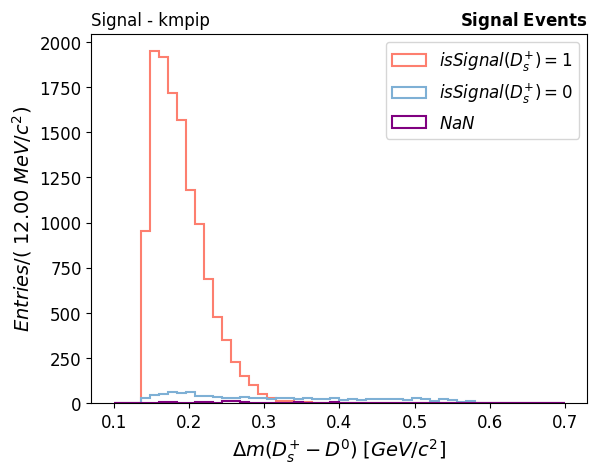

Mode: km3pi, Width Per Bin: 12.00 MeV


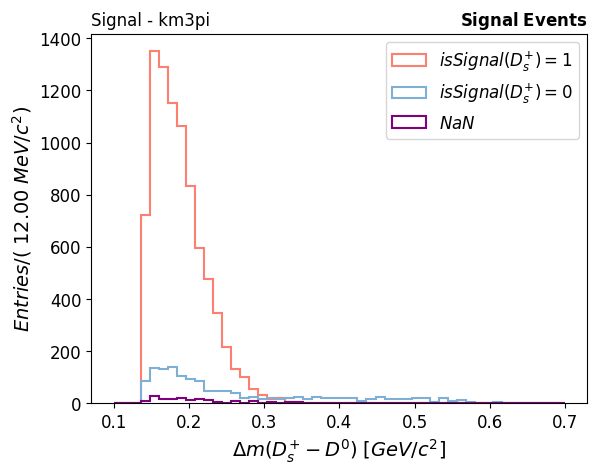

Mode: kmpippi0_eff20_May2020, Width Per Bin: 12.00 MeV


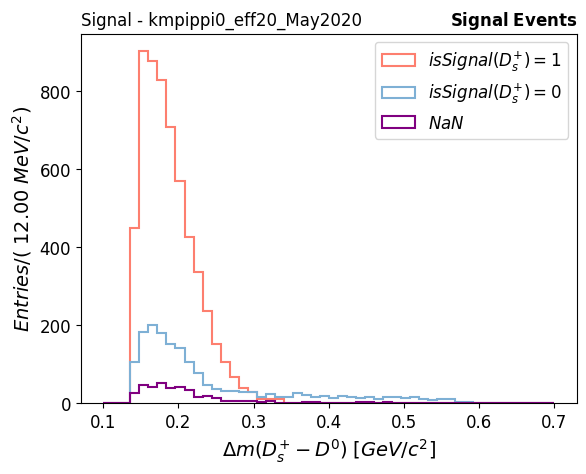

In [11]:
# Plot Signal - Ds_diff_D0pi
Bins = 50
Density = False
Stacked = False
Range = [0.1, 0.7]
var = 'Ds_diff_D0pi'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0])/Bins)*1000
    print(f"Mode: {mode}, Width Per Bin: {perBin:.2f} MeV")
    
    label1 = r'$isSignal(D_s^{+})=1$'
    label2 = r'$isSignal(D_s^{+})=0$'
    label3 = r'$NaN$'
    
    labels = [label1, label2, label3]
    colors = ['#fd7f6f', '#7eb0d5', 'purple']
    
    df = DataFrames[f"Signal_{mode}"]
    df_cut = df[df['gammaveto_M_Correction'] >= dM]
    
    data = [
        df_cut[df_cut['Ds_isSignal'] == 1][var],
        df_cut[df_cut['Ds_isSignal'] == 0][var],
        df_cut[df_cut['Ds_isSignal'].isna()][var]
    ]
    
    plt.hist(data[::-1], color=colors[::-1], label=labels[::-1], alpha=1, 
             range=Range, stacked=Stacked, density=Density, bins=Bins, 
             histtype='step', linewidth=1.5)
    
    # Title
    plt.title(f'Signal - {mode}', loc="left")
    plt.title(r'$\bf Signal\;Events$', loc="right")
    # Label
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    # plt.yscale("log")
    plt.legend()
    plt.show()

Mode: kmpip, Width Per Bin: 5.00 MeV


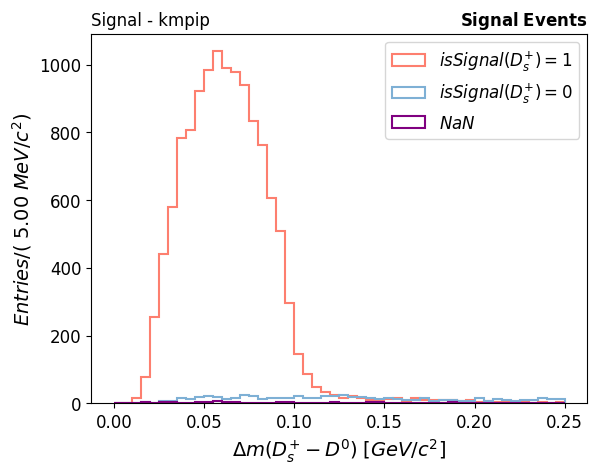

Mode: km3pi, Width Per Bin: 5.00 MeV


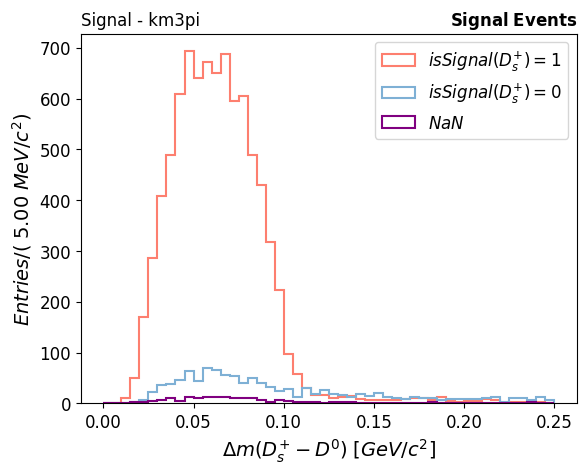

Mode: kmpippi0_eff20_May2020, Width Per Bin: 5.00 MeV


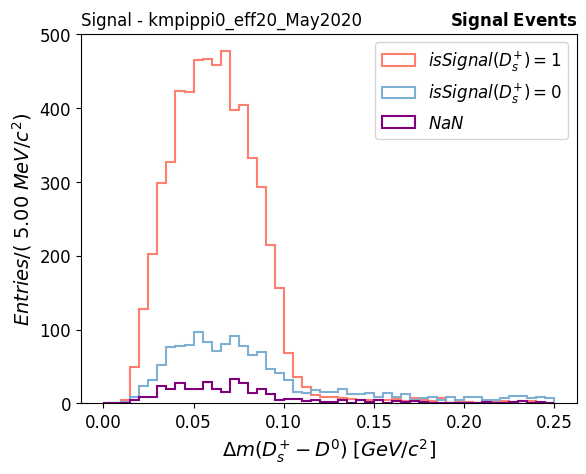

In [12]:
# Plot Signal - Ds_massDifference_0
Bins = 50
Density = False
Stacked = False
Range = [0.0, 0.25]
var = 'Ds_massDifference_0'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0])/Bins)*1000
    print(f"Mode: {mode}, Width Per Bin: {perBin:.2f} MeV")
    
    label1 = r'$isSignal(D_s^{+})=1$'
    label2 = r'$isSignal(D_s^{+})=0$'
    label3 = r'$NaN$'
    
    labels = [label1, label2, label3]
    colors = ['#fd7f6f', '#7eb0d5', 'purple']
    
    df = DataFrames[f"Signal_{mode}"]
    df_cut = df[df['gammaveto_M_Correction'] >= dM]
    
    data = [
        df_cut[df_cut['Ds_isSignal'] == 1][var],
        df_cut[df_cut['Ds_isSignal'] == 0][var],
        df_cut[df_cut['Ds_isSignal'].isna()][var]
    ]
    
    plt.hist(data[::-1], color=colors[::-1], label=labels[::-1], alpha=1, 
             range=Range, stacked=Stacked, density=Density, bins=Bins, 
             histtype='step', linewidth=1.5)
    
    # Title
    plt.title(f'Signal - {mode}', loc="left")
    plt.title(r'$\bf Signal\;Events$', loc="right")
    # Label
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    # plt.yscale("log")
    plt.legend()
    plt.show()

 ### Background Plots

In [13]:
# Background plotting parameters
dM = 0.1  # gammaveto_M_Correction cut value

Mode: kmpip, Width Per Bin: 12.00 MeV


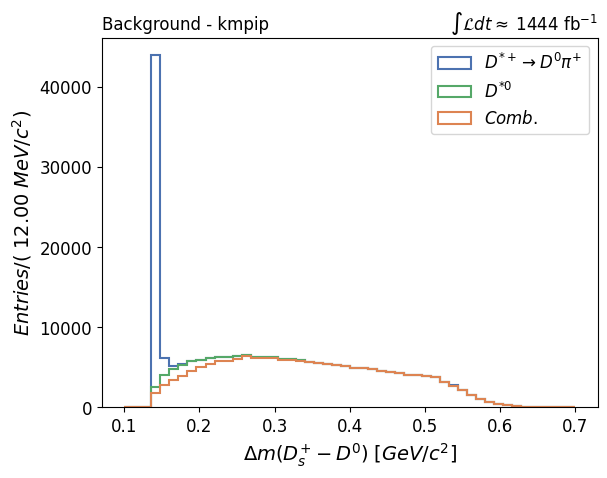

Mode: km3pi, Width Per Bin: 12.00 MeV


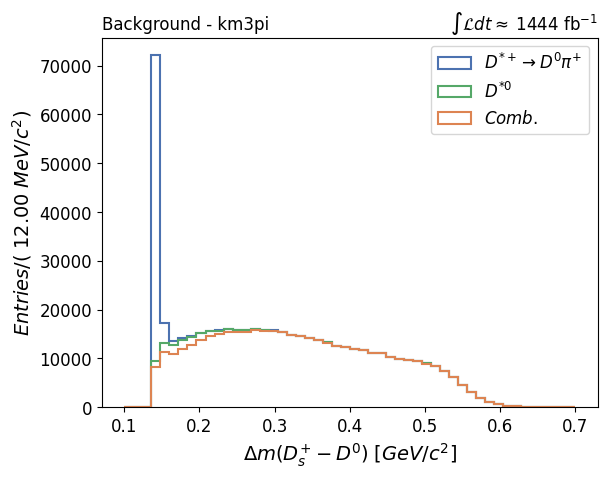

Mode: kmpippi0_eff20_May2020, Width Per Bin: 12.00 MeV


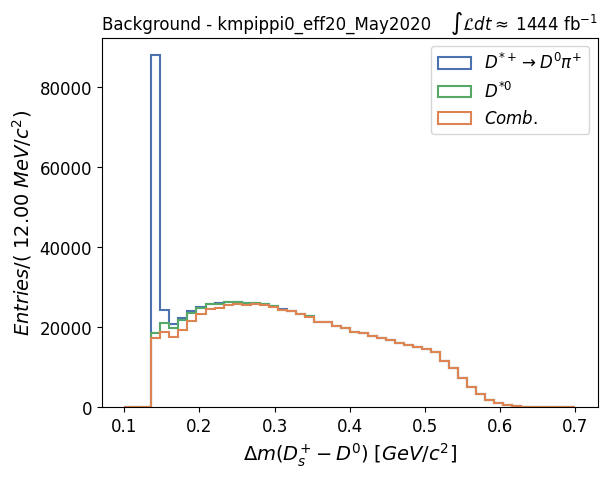

In [14]:
# Plot Background - Ds_diff_D0pi
Bins = 50
Density = False
Stacked = True
Range = [0.1, 0.7]
var = 'Ds_diff_D0pi'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0])/Bins)*1000
    print(f"Mode: {mode}, Width Per Bin: {perBin:.2f} MeV")
    
    df = DataFrames[f"All_{mode}"]
    df_cut = df[df['gammaveto_M_Correction'] >= dM]
    
    if USE_4_CATEGORIES:
        label1 = r'$Comb.$'
        label2 = r'$NaN$'
        label3 = r'$D^{*0}$'
        label4 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'
        
        labels = [label1, label2, label3, label4]
        colors = ["#DD8452", "#C44E52", "#55A868", "#4C72B0"]
        
        data = [
            df_cut[(abs(df_cut["Ds_mcPDG"]) != 413) & 
                   (abs(df_cut["Ds_mcPDG"]) != 423) & 
                   (~df_cut["Ds_mcPDG"].isna())][var],
            df_cut[df_cut["Ds_mcPDG"].isna()][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 423][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 413][var]
        ]
    else:  # 3 categories
        label1 = r'$Comb.$'
        label2 = r'$D^{*0}$'
        label3 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'
        
        labels = [label1, label2, label3]
        colors = ["#DD8452", "#55A868", "#4C72B0"]
        
        data = [
            df_cut[(abs(df_cut["Ds_mcPDG"]) != 413) & 
                   (abs(df_cut["Ds_mcPDG"]) != 423)][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 423][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 413][var]
        ]
    
    plt.hist(data, color=colors, label=labels, density=Density, 
             stacked=Stacked, bins=Bins, alpha=1, histtype='step', 
             linewidth=1.5, range=Range)
    
    # Title
    plt.title(f'Background - {mode}', loc="left")
    plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
    # Label
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend(loc='upper right')
    plt.show()

Mode: kmpip, Width Per Bin: 5.00 MeV


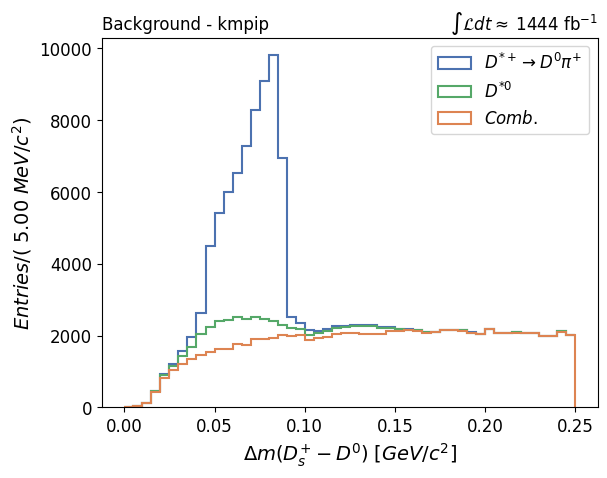

Mode: km3pi, Width Per Bin: 5.00 MeV


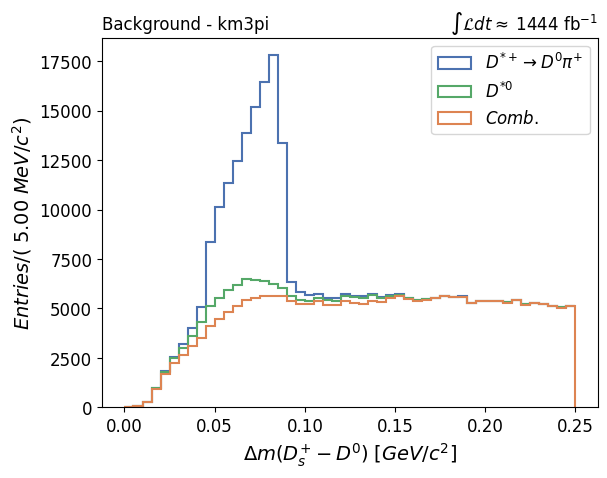

Mode: kmpippi0_eff20_May2020, Width Per Bin: 5.00 MeV


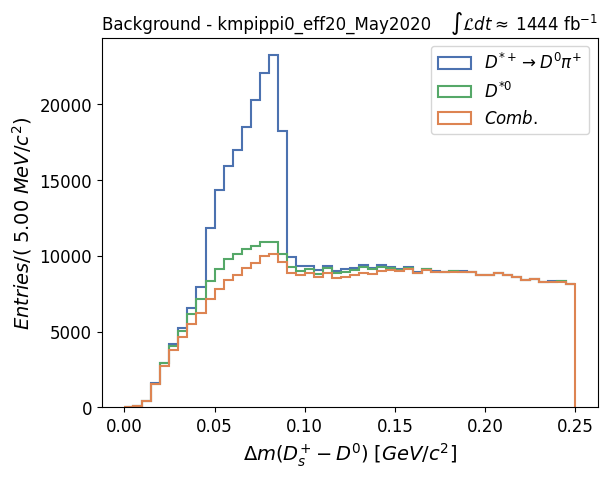

In [15]:
# Plot Background - Ds_massDifference_0
Bins = 50
Density = False
Stacked = True
Range = [0.0, 0.25]
var = 'Ds_massDifference_0'

for mode in decay_config.keys():
    perBin = ((Range[1] - Range[0])/Bins)*1000
    print(f"Mode: {mode}, Width Per Bin: {perBin:.2f} MeV")
    
    df = DataFrames[f"All_{mode}"]
    df_cut = df[df['gammaveto_M_Correction'] >= dM]
    
    if USE_4_CATEGORIES:
        label1 = r'$Comb.$'
        label2 = r'$NaN$'
        label3 = r'$D^{*0}$'
        label4 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'
        
        labels = [label1, label2, label3, label4]
        colors = ["#DD8452", "#C44E52", "#55A868", "#4C72B0"]
        
        data = [
            df_cut[(abs(df_cut["Ds_mcPDG"]) != 413) & 
                   (abs(df_cut["Ds_mcPDG"]) != 423) & 
                   (~df_cut["Ds_mcPDG"].isna())][var],
            df_cut[df_cut["Ds_mcPDG"].isna()][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 423][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 413][var]
        ]
    else:  # 3 categories
        label1 = r'$Comb.$'
        label2 = r'$D^{*0}$'
        label3 = r'$D^{*+} \rightarrow D^{0} \pi^{+}$'
        
        labels = [label1, label2, label3]
        colors = ["#DD8452", "#55A868", "#4C72B0"]
        
        data = [
            df_cut[(abs(df_cut["Ds_mcPDG"]) != 413) & 
                   (abs(df_cut["Ds_mcPDG"]) != 423)][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 423][var],
            df_cut[abs(df_cut["Ds_mcPDG"]) == 413][var]
        ]
    
    plt.hist(data, color=colors, label=labels, density=Density, 
             stacked=Stacked, bins=Bins, alpha=1, histtype='step', 
             linewidth=1.5, range=Range)
    
    # Title
    plt.title(f'Background - {mode}', loc="left")
    plt.title(r'$\int\mathcal{L}dt\approx\;1444$ fb$^{-1}$', loc="right")
    # Label
    plt.ylabel(r'$Entries/(\; {width:.2f}\;MeV/c^2)$'.format(width=perBin))
    plt.xlabel(r'$\Delta m(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    plt.legend(loc='upper right')
    plt.show()

 # DEEP ANALYSIS: Δm_e vs Δm_π SANITY CHECKS
 ---

 **Goal**: Verify whether a 2D fit in (Δm_e, Δm_π) is justified before investing in BDT and fit development.

 ## Definitions

 * **Δm_e** = `Ds_massDifference_0` (electron mass on lepton track)
 * **Δm_π** = `Ds_diff_D0pi` (pion mass on same track)
 * **Δm_shift** = Δm_π - Δm_e
 * **D*+ veto**: 0.142 < Δm_π ≤ 0.15 GeV/c²

 **Truth categories**:
 - Signal: isSignal(D_s^+) = 1
 - Bkg1: D*+ → D0 π+ (mcPDG = 413)
 - Bkg2: D*0 → D0 π0/γ (mcPDG = 423)
 - Bkg3: Combinatorial (everything else)

 ## Stage 1: Global Δm_e Efficiency of the Δm_π Veto

 Check if the D*+ veto (0.142 < Δm_π ≤ 0.15) sculpts the Δm_e distribution.

In [16]:
# Define D*+ veto
dstar_veto_min = 0.142
dstar_veto_max = 0.15
dM = 0.1  # gammaveto_M_Correction cut


Stage 1 - Signal - kmpip


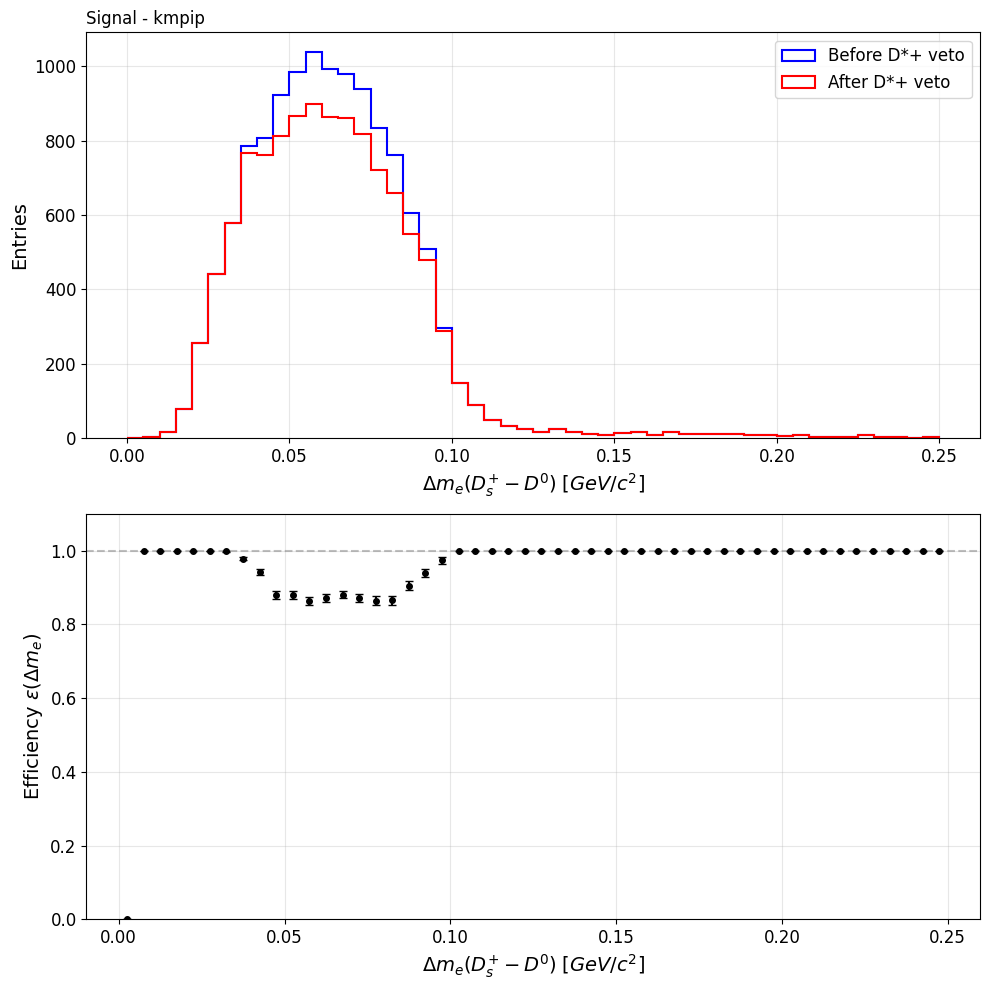

Overall efficiency: 0.9104
Events before: 12415
Events after: 11302

Stage 1 - Signal - km3pi


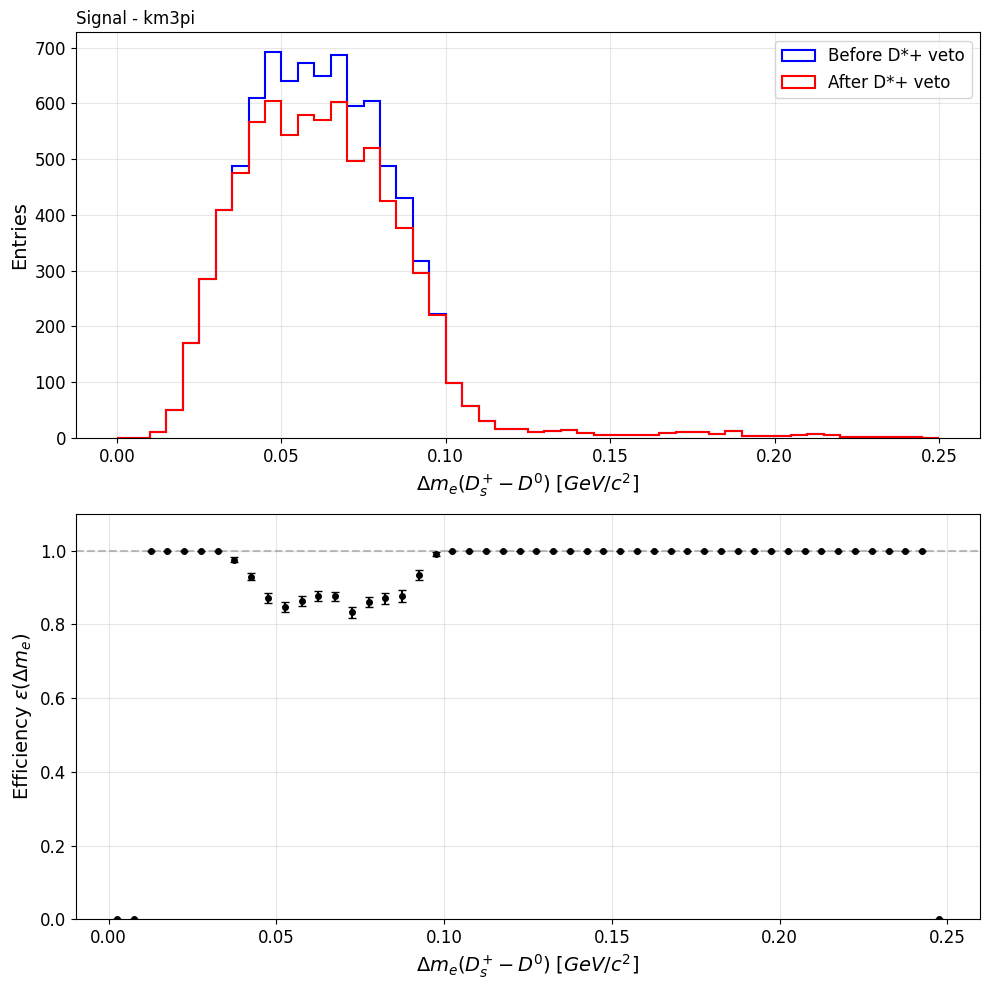

Overall efficiency: 0.9022
Events before: 8409
Events after: 7587

Stage 1 - Signal - kmpippi0_eff20_May2020


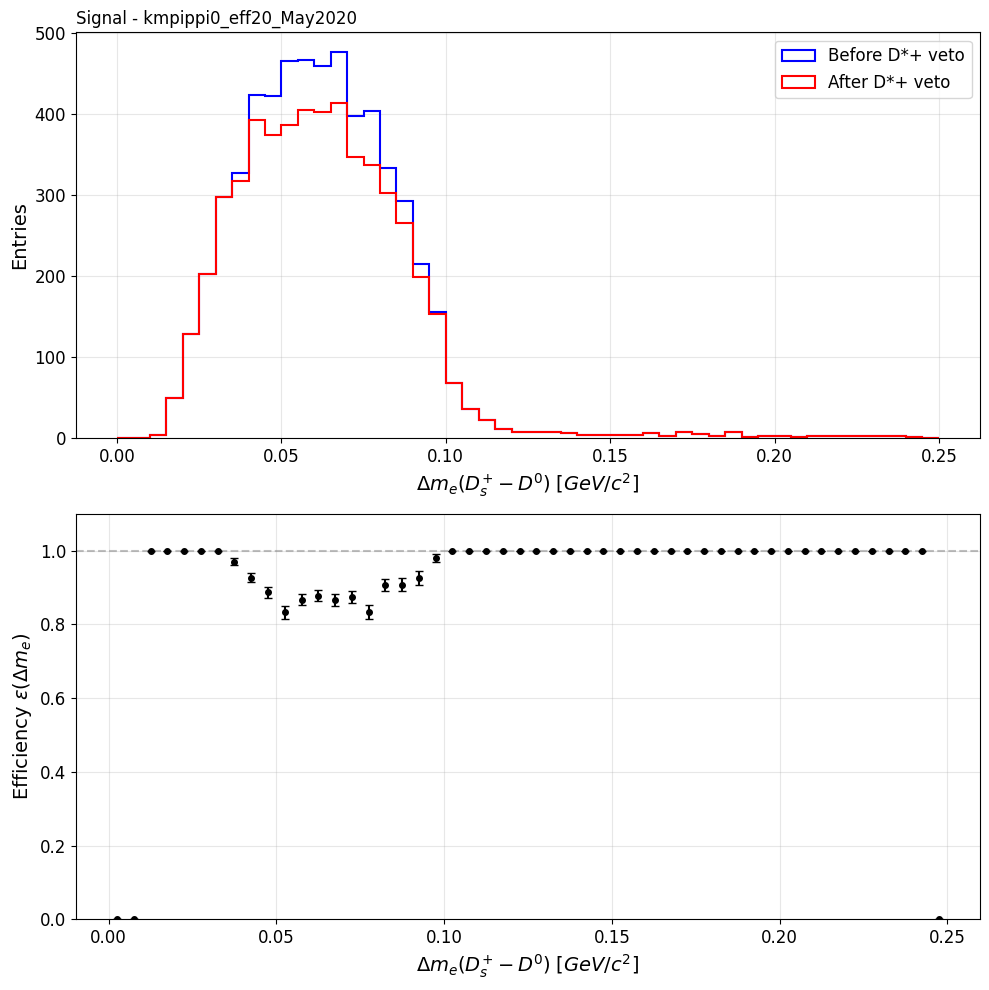

Overall efficiency: 0.9058
Events before: 5767
Events after: 5224


In [17]:
# Stage 1: Signal - Δm_e efficiency plots
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 1 - Signal - {mode}")
    print('='*80)
    
    df = DataFrames[f"Signal_{mode}"]
    df = df[df['gammaveto_M_Correction'] >= dM]
    df_signal = df[df['Ds_isSignal'] == 1]
    
    # Before veto
    df_before = df_signal
    
    # After veto (OUTSIDE the D*+ window)
    df_after = df_signal[~((df_signal['Ds_diff_D0pi'] > dstar_veto_min) & 
                           (df_signal['Ds_diff_D0pi'] <= dstar_veto_max))]
    
    # Make histograms
    bins = 50
    range_dm = [0.0, 0.25]
    
    hist_before, bin_edges = np.histogram(df_before['Ds_massDifference_0'], 
                                          bins=bins, range=range_dm)
    hist_after, _ = np.histogram(df_after['Ds_massDifference_0'], 
                                 bins=bins, range=range_dm)
    
    # Calculate efficiency
    with np.errstate(divide='ignore', invalid='ignore'):
        efficiency = np.where(hist_before > 0, hist_after / hist_before, 0)
        # Binomial errors
        eff_err = np.where(hist_before > 0, 
                          np.sqrt(efficiency * (1 - efficiency) / hist_before), 0)
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot before and after
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Top: distributions
    ax1.hist(df_before['Ds_massDifference_0'], bins=bins, range=range_dm, 
             histtype='step', linewidth=1.5, label='Before D*+ veto', color='blue')
    ax1.hist(df_after['Ds_massDifference_0'], bins=bins, range=range_dm, 
             histtype='step', linewidth=1.5, label='After D*+ veto', color='red')
    ax1.set_xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    ax1.set_ylabel('Entries')
    ax1.set_title(f'Signal - {mode}', loc='left')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Bottom: efficiency
    ax2.errorbar(bin_centers, efficiency, yerr=eff_err, fmt='o', 
                markersize=4, capsize=3, color='black')
    ax2.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
    ax2.set_xlabel(r'$\Delta m_e(D_s^{+} - D^{0})\;[GeV/c^{2}]$')
    ax2.set_ylabel(r'Efficiency $\varepsilon(\Delta m_e)$')
    ax2.set_ylim([0, 1.1])
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    overall_eff = len(df_after) / len(df_before) if len(df_before) > 0 else 0
    print(f"Overall efficiency: {overall_eff:.4f}")
    print(f"Events before: {len(df_before)}")
    print(f"Events after: {len(df_after)}")


Stage 1 - Background - kmpip
D*+ → D0π+: Overall eff = 0.0580, N_before = 44224, N_after = 2567
D*0 → D0π0/γ: Overall eff = 0.9119, N_before = 9516, N_after = 8678
Comb: Overall eff = 0.9880, N_before = 169806, N_after = 167776


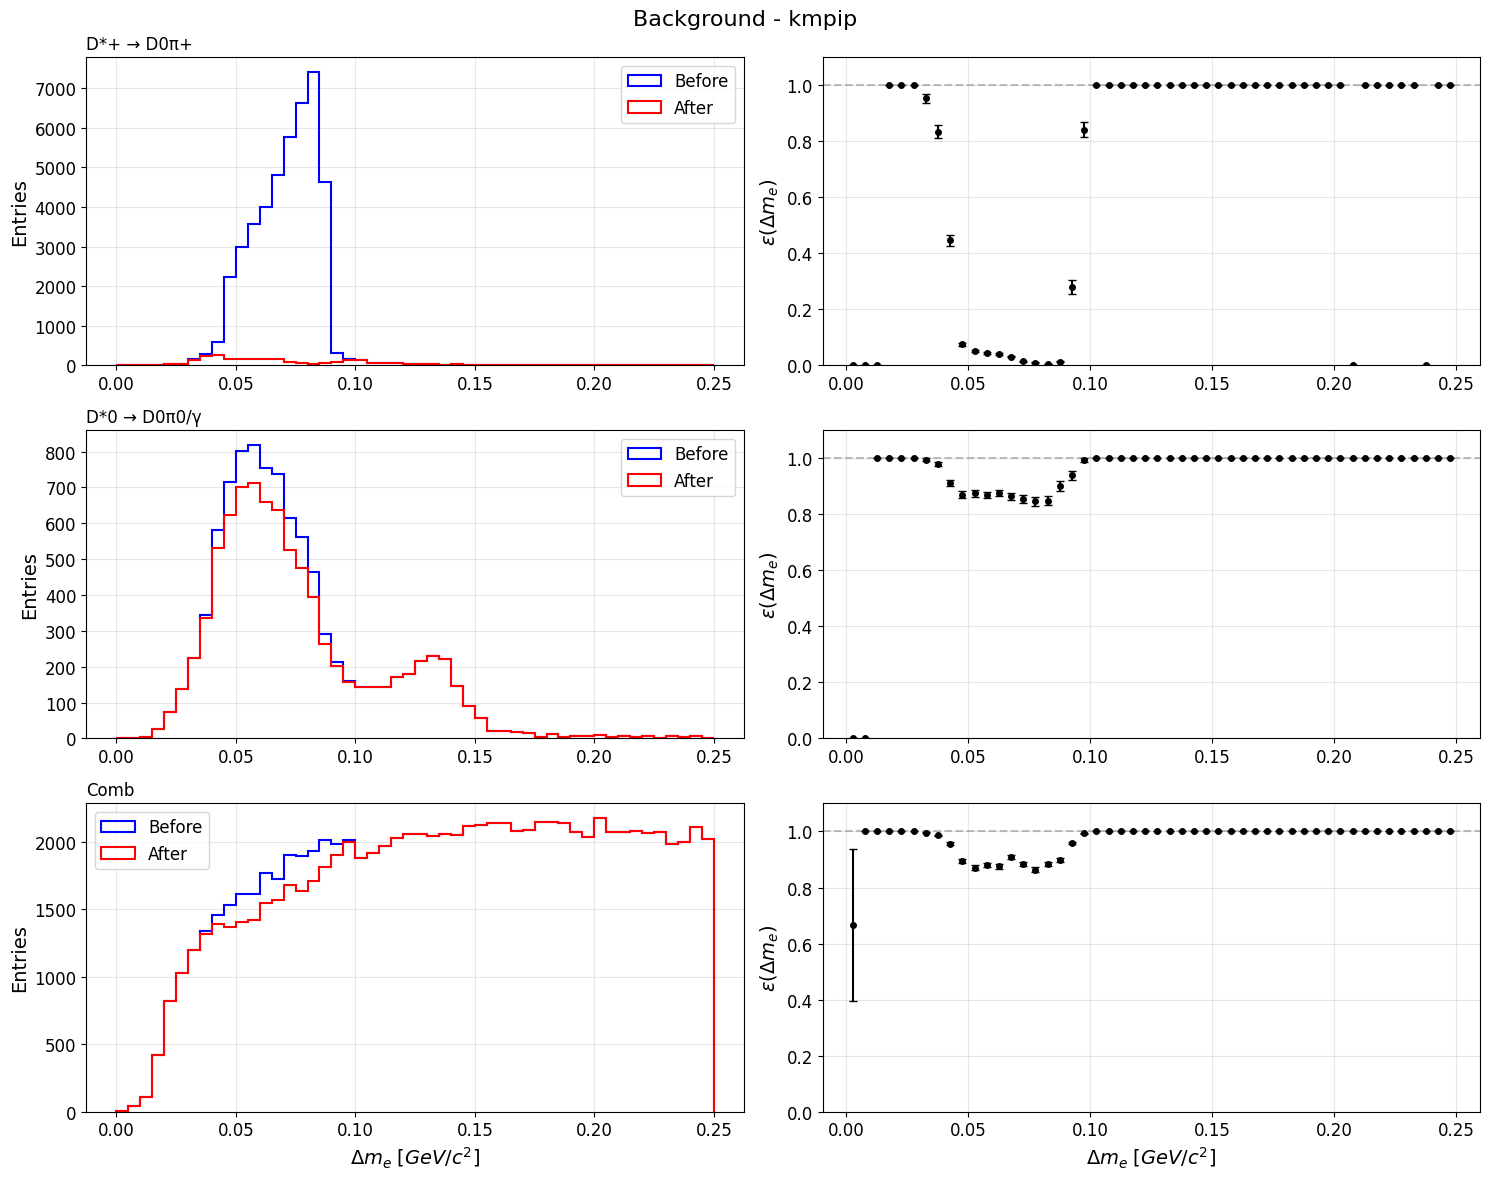


Stage 1 - Background - km3pi
D*+ → D0π+: Overall eff = 0.0784, N_before = 68621, N_after = 5379
D*0 → D0π0/γ: Overall eff = 0.9126, N_before = 13428, N_after = 12254
Comb: Overall eff = 0.9789, N_before = 431788, N_after = 422677


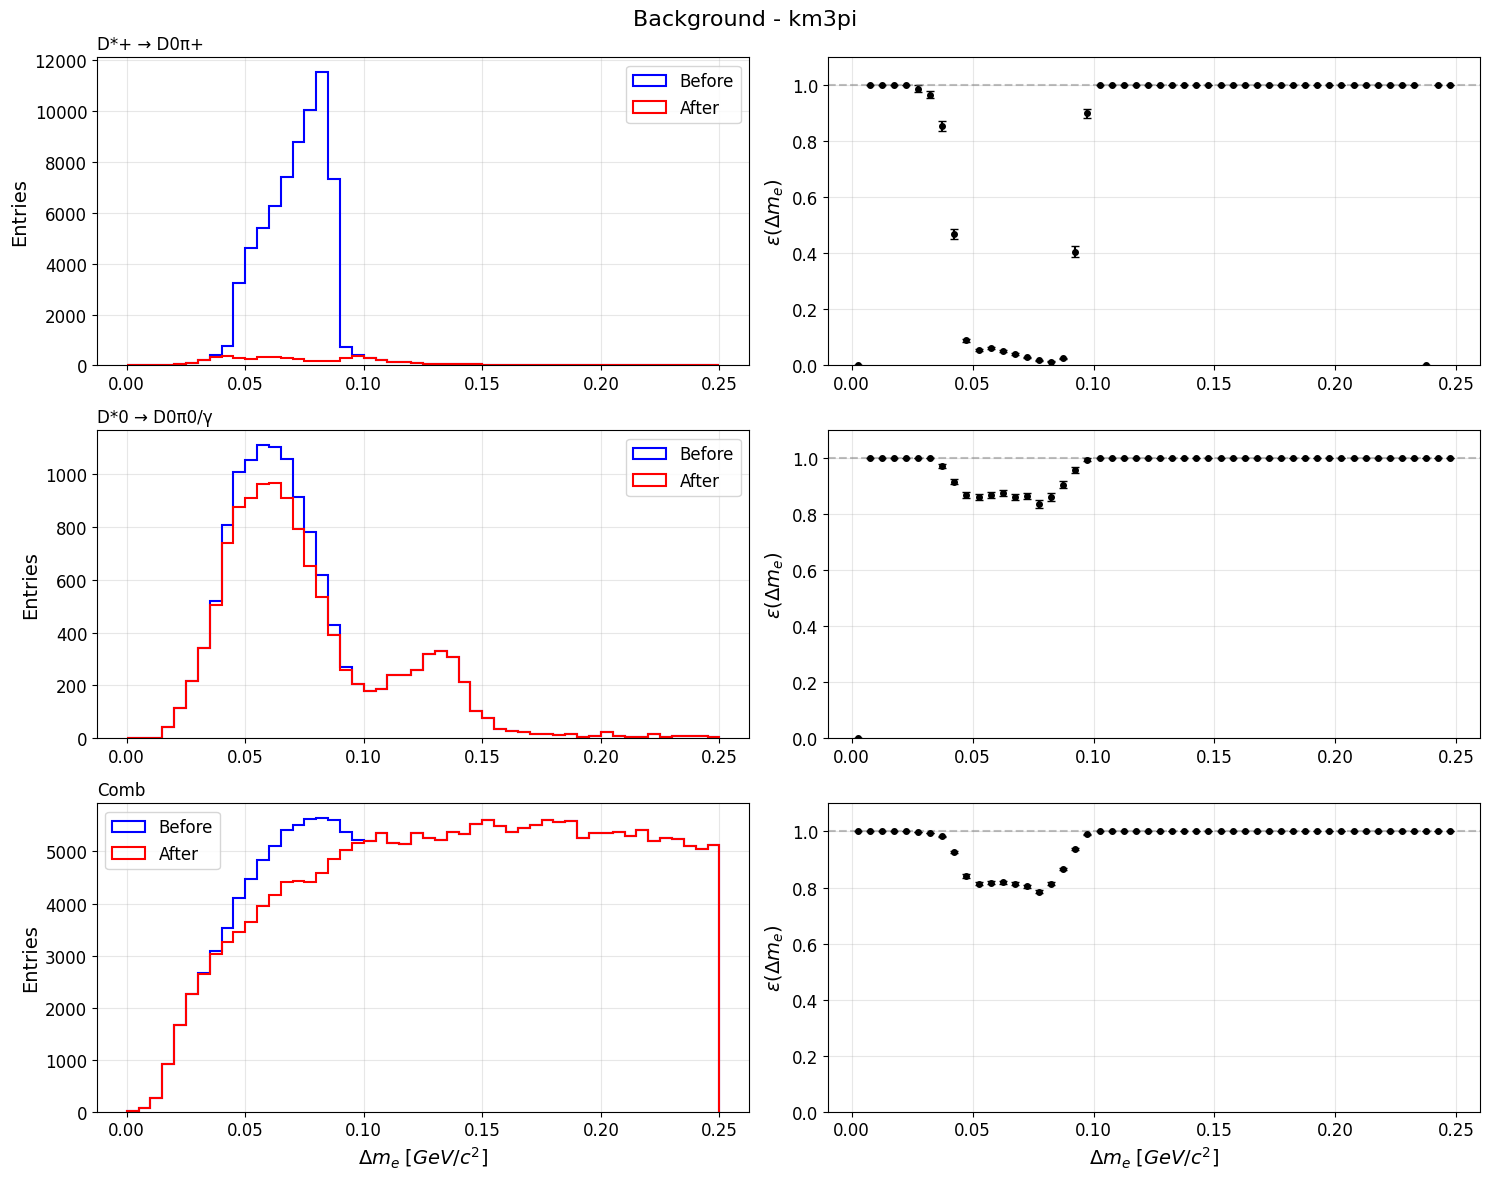


Stage 1 - Background - kmpippi0_eff20_May2020
D*+ → D0π+: Overall eff = 0.0725, N_before = 75529, N_after = 5474
D*0 → D0π0/γ: Overall eff = 0.9188, N_before = 16625, N_after = 15275
Comb: Overall eff = 0.9728, N_before = 703378, N_after = 684256


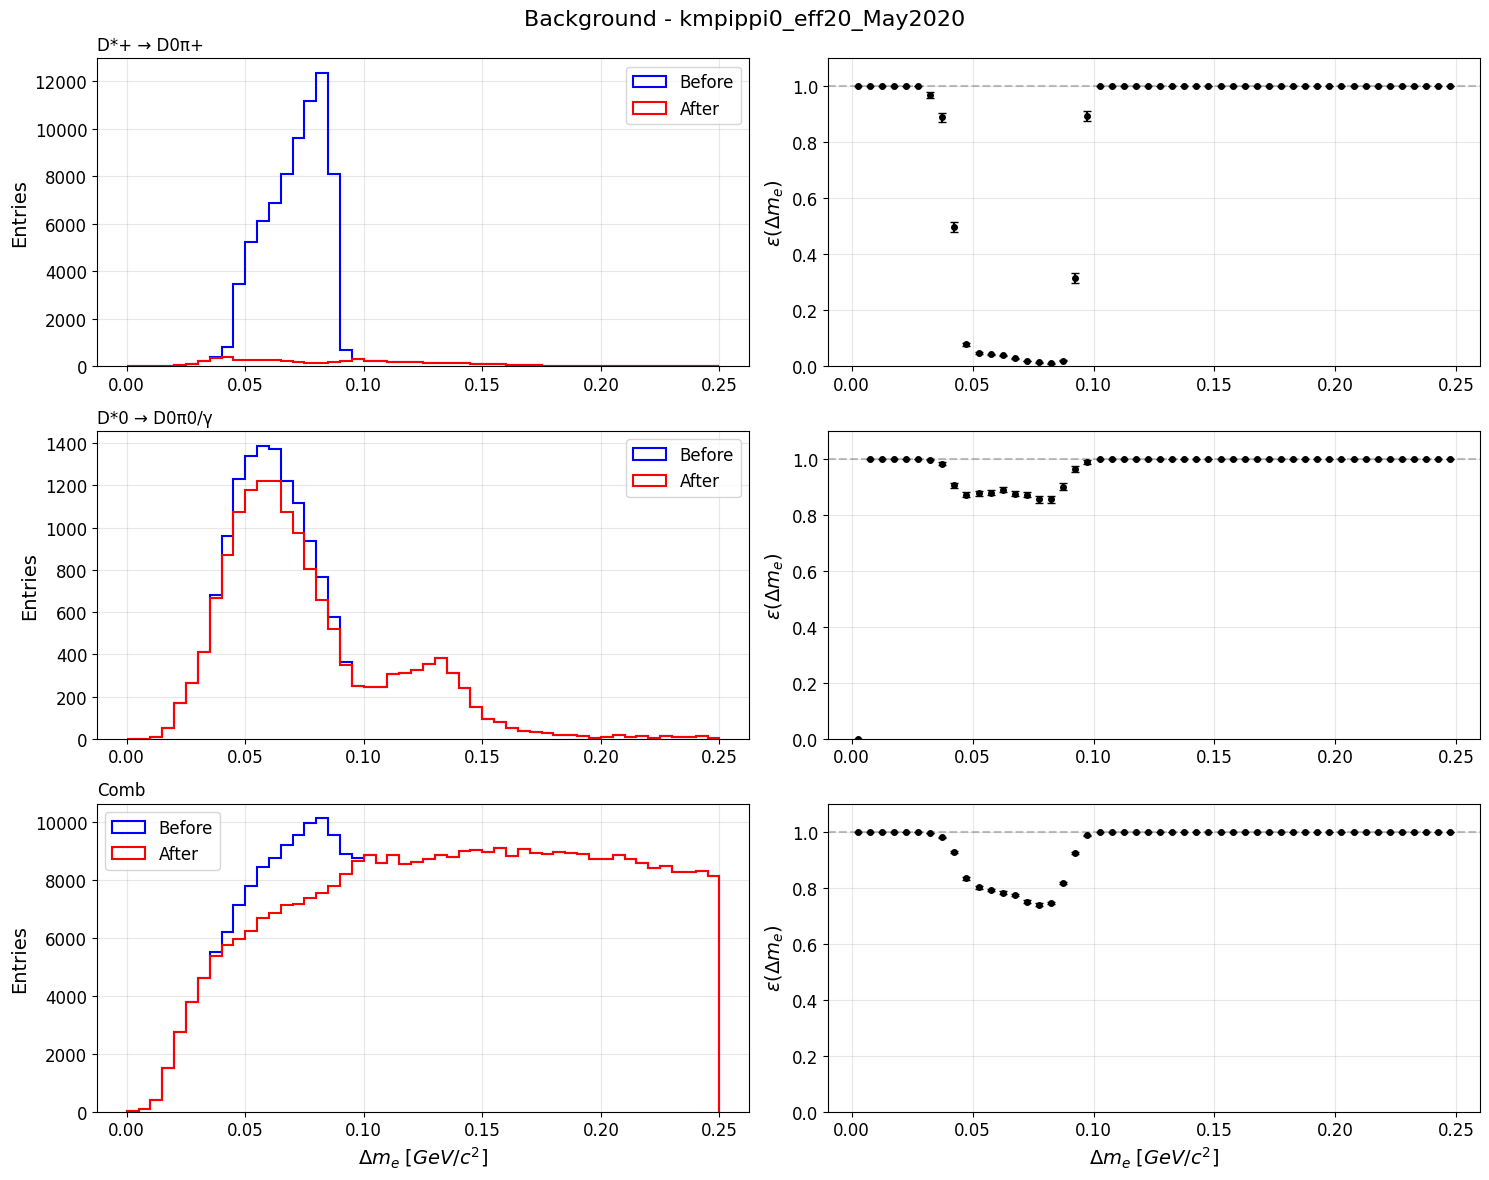

In [18]:
# Stage 1: Background categories - Δm_e efficiency plots
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 1 - Background - {mode}")
    print('='*80)
    
    df = DataFrames[f"All_{mode}"]
    df = df[df['gammaveto_M_Correction'] >= dM]
    
    # Define background categories based on toggle
    if USE_4_CATEGORIES:
        bkg_categories = {
            'D*+ → D0π+': df[abs(df['Ds_mcPDG']) == 413],
            'D*0 → D0π0/γ': df[abs(df['Ds_mcPDG']) == 423],
            'Comb': df[(abs(df['Ds_mcPDG']) != 413) & 
                       (abs(df['Ds_mcPDG']) != 423) & 
                       (~df['Ds_mcPDG'].isna())],
            'NaN': df[df['Ds_mcPDG'].isna()]
        }
        fig, axes = plt.subplots(4, 2, figsize=(15, 16))
    else:
        bkg_categories = {
            'D*+ → D0π+': df[abs(df['Ds_mcPDG']) == 413],
            'D*0 → D0π0/γ': df[abs(df['Ds_mcPDG']) == 423],
            'Comb': df[(abs(df['Ds_mcPDG']) != 413) & 
                       (abs(df['Ds_mcPDG']) != 423)]
        }
        fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    
    for idx, (cat_name, df_cat) in enumerate(bkg_categories.items()):
        # Before veto
        df_before = df_cat
        
        # After veto
        df_after = df_cat[~((df_cat['Ds_diff_D0pi'] > dstar_veto_min) & 
                            (df_cat['Ds_diff_D0pi'] <= dstar_veto_max))]
        
        # Make histograms
        bins = 50
        range_dm = [0.0, 0.25]
        
        hist_before, bin_edges = np.histogram(df_before['Ds_massDifference_0'], 
                                              bins=bins, range=range_dm)
        hist_after, _ = np.histogram(df_after['Ds_massDifference_0'], 
                                     bins=bins, range=range_dm)
        
        # Calculate efficiency
        with np.errstate(divide='ignore', invalid='ignore'):
            efficiency = np.where(hist_before > 0, hist_after / hist_before, 0)
            eff_err = np.where(hist_before > 0, 
                              np.sqrt(efficiency * (1 - efficiency) / hist_before), 0)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plot distributions
        ax1 = axes[idx, 0]
        ax1.hist(df_before['Ds_massDifference_0'], bins=bins, range=range_dm, 
                histtype='step', linewidth=1.5, label='Before', color='blue')
        ax1.hist(df_after['Ds_massDifference_0'], bins=bins, range=range_dm, 
                histtype='step', linewidth=1.5, label='After', color='red')
        ax1.set_ylabel('Entries')
        ax1.set_title(f'{cat_name}', loc='left')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # Plot efficiency
        ax2 = axes[idx, 1]
        ax2.errorbar(bin_centers, efficiency, yerr=eff_err, fmt='o', 
                    markersize=4, capsize=3, color='black')
        ax2.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
        ax2.set_ylabel(r'$\varepsilon(\Delta m_e)$')
        ax2.set_ylim([0, 1.1])
        ax2.grid(alpha=0.3)
        
        if idx == len(bkg_categories) - 1:
            ax1.set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
            ax2.set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
        
        overall_eff = len(df_after) / len(df_before) if len(df_before) > 0 else 0
        print(f"{cat_name}: Overall eff = {overall_eff:.4f}, N_before = {len(df_before)}, N_after = {len(df_after)}")
    
    plt.suptitle(f'Background - {mode}', fontsize=16)
    plt.tight_layout()
    plt.show()

 ## Stage 2: Momentum-Sliced Efficiency

 Check if the veto behaves differently at low and high p_e.

In [19]:
# Define momentum bins
p_bins = [0.05, 0.15, 0.25, 0.35, 0.6]  # GeV
p_labels = ['0.05-0.15', '0.15-0.25', '0.25-0.35', '>0.35']


Stage 2 - Signal - kmpip
p_e 0.05-0.15 GeV: eff = 0.9845, N = 7789
p_e 0.15-0.25 GeV: eff = 0.8294, N = 3294
p_e 0.25-0.35 GeV: eff = 0.6502, N = 949
p_e >0.35 GeV: eff = 0.6667, N = 294


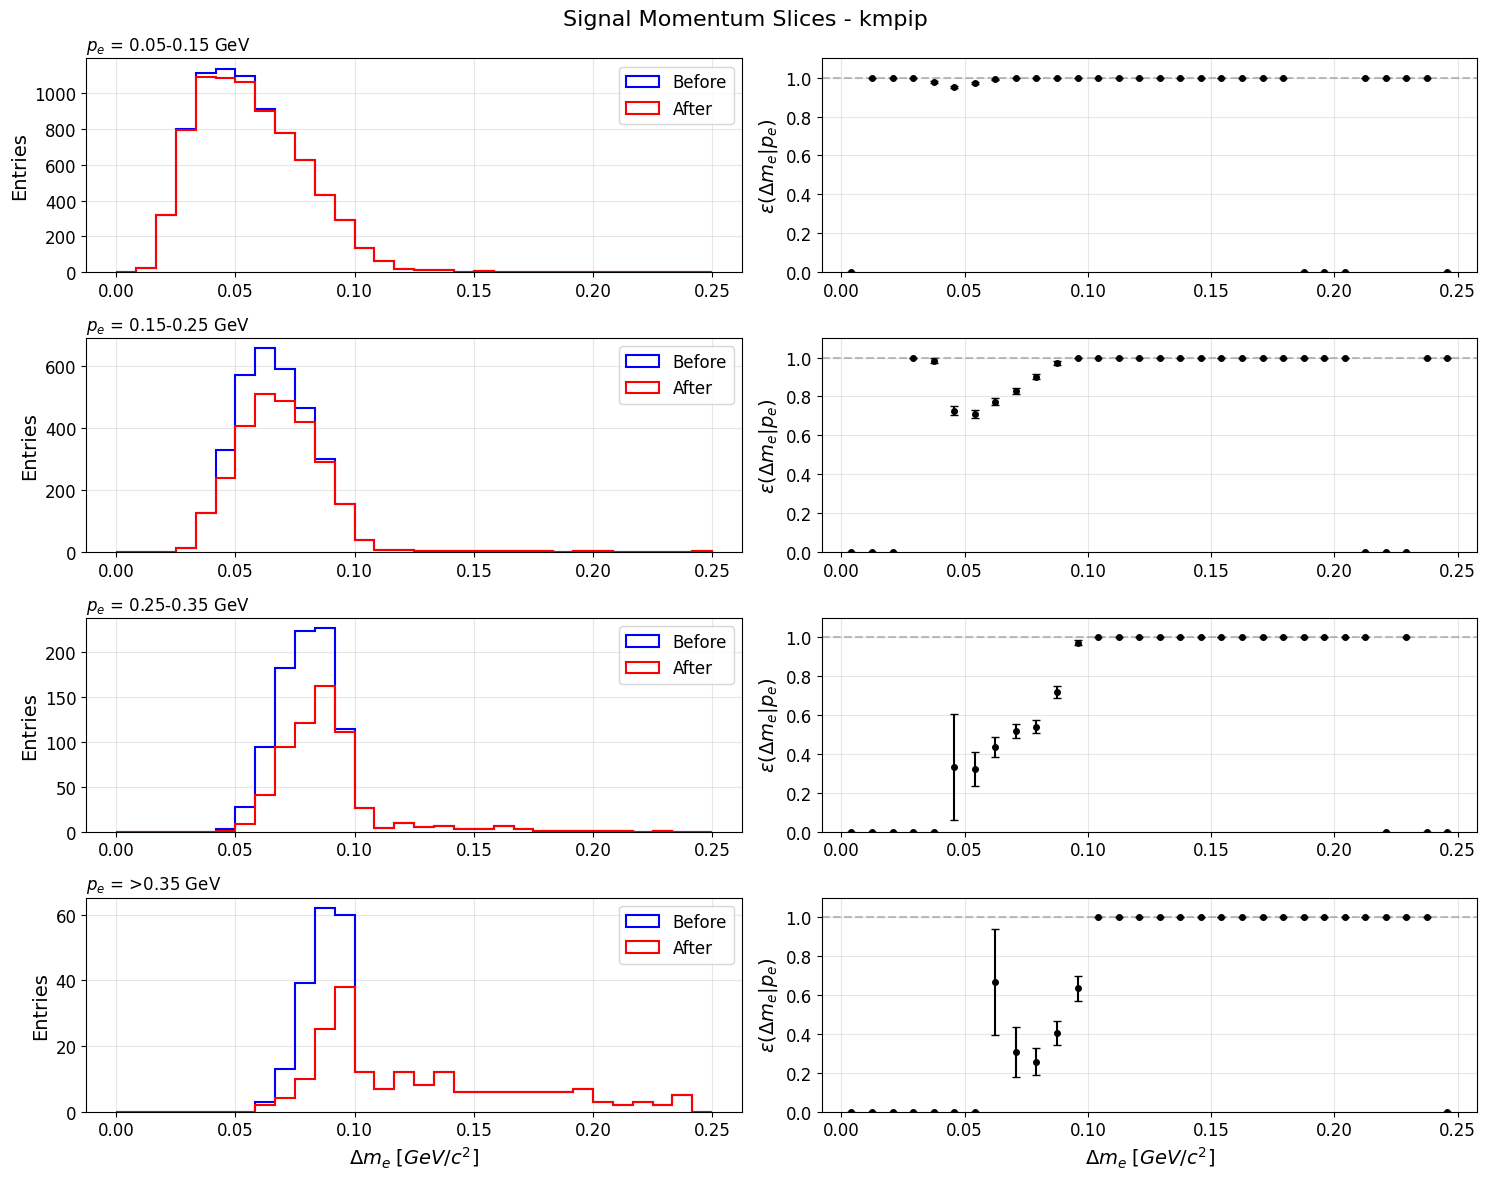


Stage 2 - Signal - km3pi
p_e 0.05-0.15 GeV: eff = 0.9829, N = 5209
p_e 0.15-0.25 GeV: eff = 0.8167, N = 2242
p_e 0.25-0.35 GeV: eff = 0.6361, N = 698
p_e >0.35 GeV: eff = 0.6792, N = 212


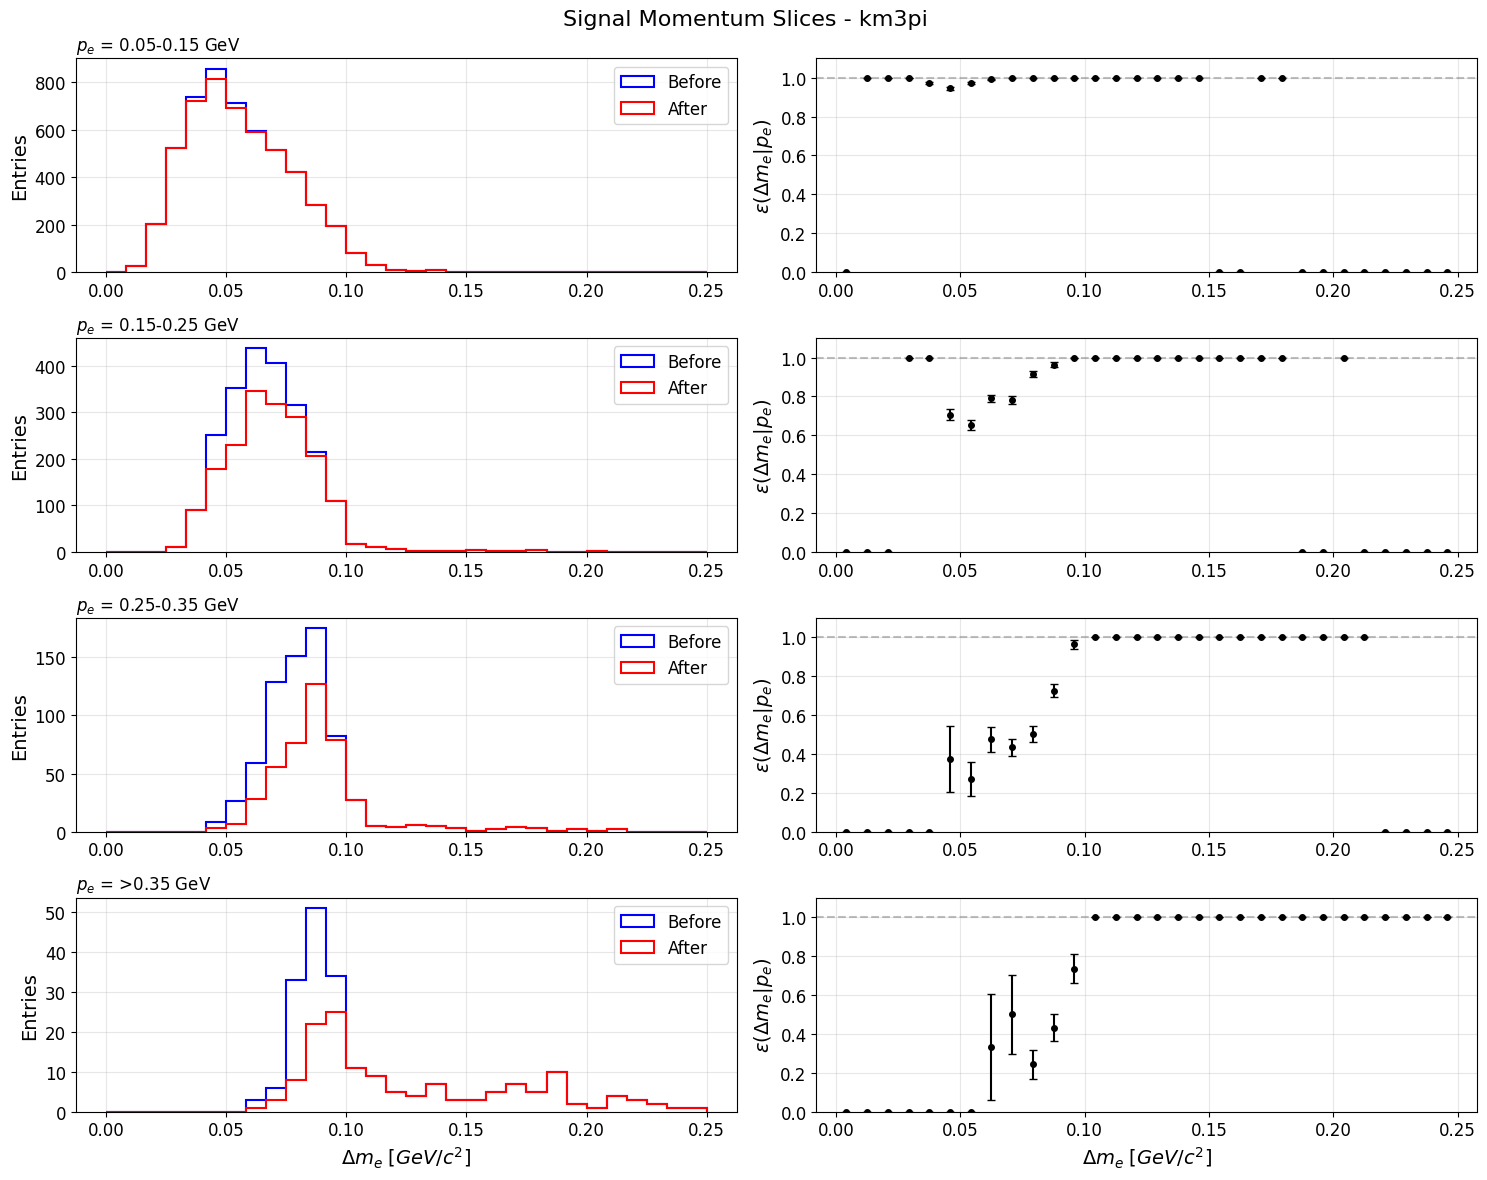


Stage 2 - Signal - kmpippi0_eff20_May2020
p_e 0.05-0.15 GeV: eff = 0.9827, N = 3587
p_e 0.15-0.25 GeV: eff = 0.8224, N = 1560
p_e 0.25-0.35 GeV: eff = 0.6624, N = 471
p_e >0.35 GeV: eff = 0.6186, N = 118


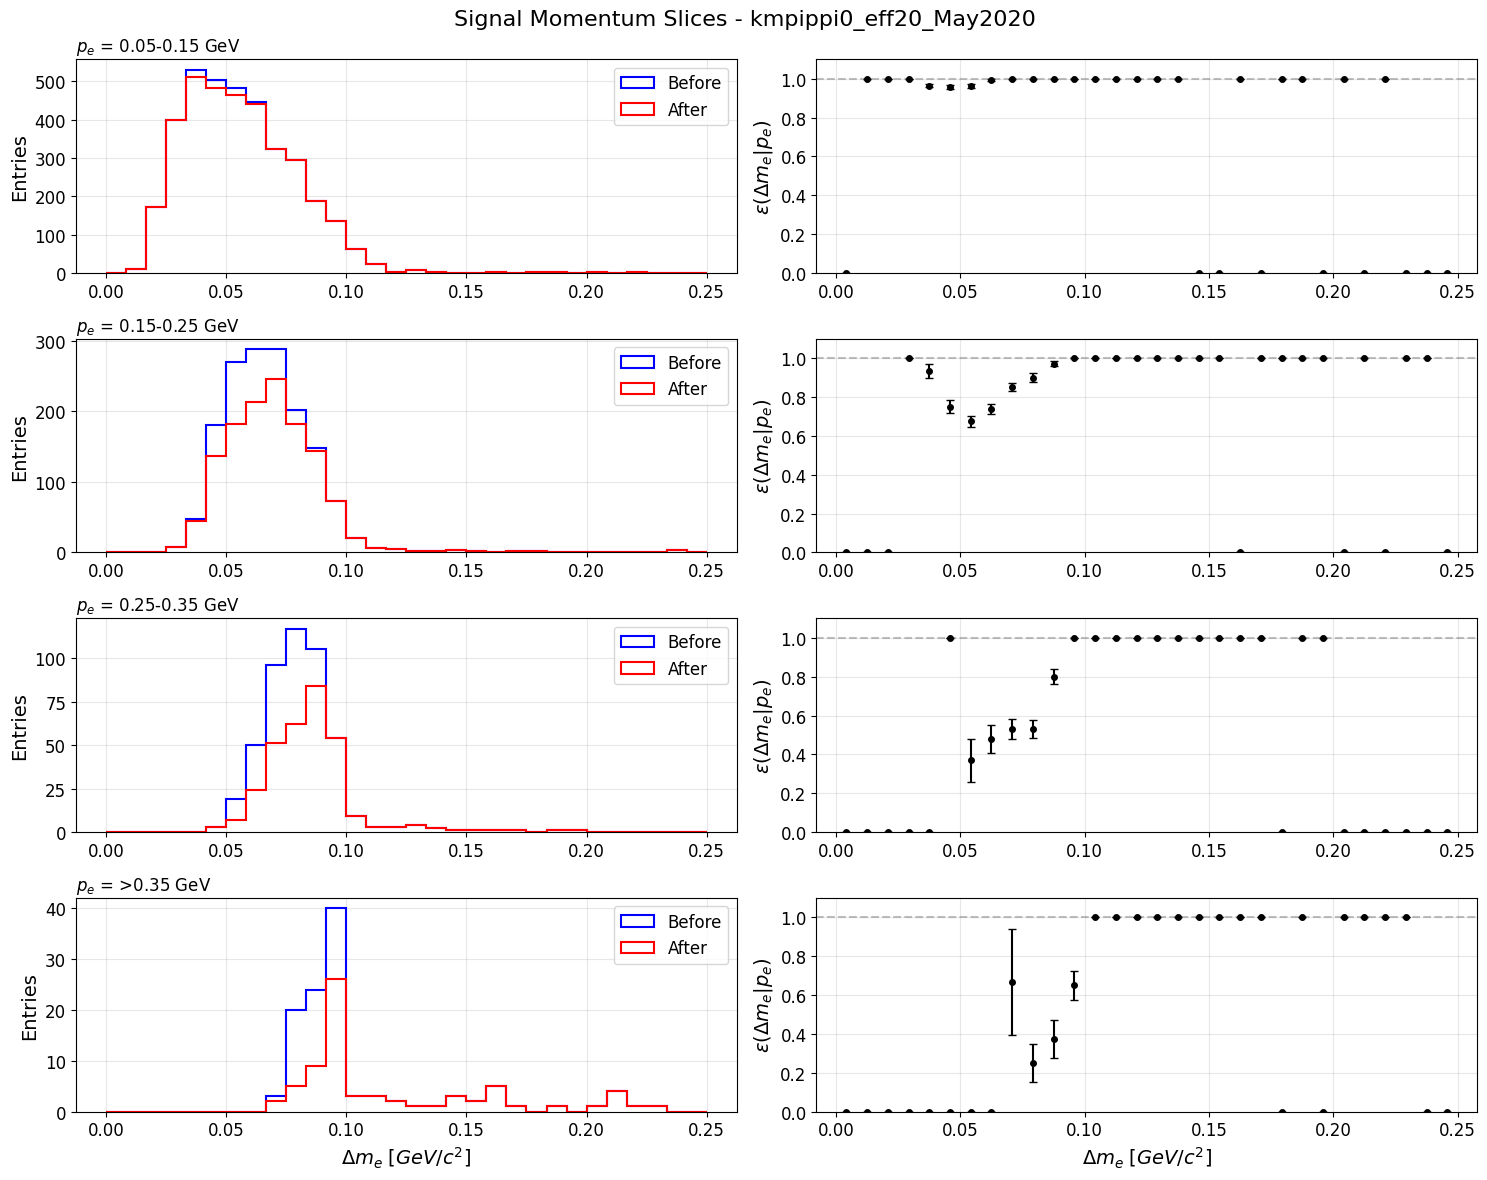

In [20]:
# Stage 2: Signal - momentum sliced efficiency
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 2 - Signal - {mode}")
    print('='*80)
    
    df = DataFrames[f"Signal_{mode}"]
    df = df[df['gammaveto_M_Correction'] >= dM]
    df_signal = df[df['Ds_isSignal'] == 1]
    
    fig, axes = plt.subplots(len(p_bins)-1, 2, figsize=(15, 12))
    
    for idx in range(len(p_bins)-1):
        p_min = p_bins[idx]
        p_max = p_bins[idx+1]
        
        # Select momentum slice
        df_slice = df_signal[(df_signal['e_p'] >= p_min) & (df_signal['e_p'] < p_max)]
        
        # Before and after veto
        df_before = df_slice
        df_after = df_slice[~((df_slice['Ds_diff_D0pi'] > dstar_veto_min) & 
                              (df_slice['Ds_diff_D0pi'] <= dstar_veto_max))]
        
        # Make histograms
        bins = 30
        range_dm = [0.0, 0.25]
        
        hist_before, bin_edges = np.histogram(df_before['Ds_massDifference_0'], 
                                              bins=bins, range=range_dm)
        hist_after, _ = np.histogram(df_after['Ds_massDifference_0'], 
                                     bins=bins, range=range_dm)
        
        # Calculate efficiency
        with np.errstate(divide='ignore', invalid='ignore'):
            efficiency = np.where(hist_before > 0, hist_after / hist_before, 0)
            eff_err = np.where(hist_before > 0, 
                              np.sqrt(efficiency * (1 - efficiency) / hist_before), 0)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plot distributions
        ax1 = axes[idx, 0]
        ax1.hist(df_before['Ds_massDifference_0'], bins=bins, range=range_dm, 
                histtype='step', linewidth=1.5, label='Before', color='blue')
        ax1.hist(df_after['Ds_massDifference_0'], bins=bins, range=range_dm, 
                histtype='step', linewidth=1.5, label='After', color='red')
        ax1.set_ylabel('Entries')
        ax1.set_title(f'$p_e$ = {p_labels[idx]} GeV', loc='left')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # Plot efficiency
        ax2 = axes[idx, 1]
        ax2.errorbar(bin_centers, efficiency, yerr=eff_err, fmt='o', 
                    markersize=4, capsize=3, color='black')
        ax2.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
        ax2.set_ylabel(r'$\varepsilon(\Delta m_e | p_e)$')
        ax2.set_ylim([0, 1.1])
        ax2.grid(alpha=0.3)
        
        if idx == len(p_bins)-2:
            ax1.set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
            ax2.set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
        
        overall_eff = len(df_after) / len(df_before) if len(df_before) > 0 else 0
        print(f"p_e {p_labels[idx]} GeV: eff = {overall_eff:.4f}, N = {len(df_before)}")
    
    plt.suptitle(f'Signal Momentum Slices - {mode}', fontsize=16)
    plt.tight_layout()
    plt.show()

 ## Stage 3: 2D Structure Study with Δm_shift

 Check if Δm_π gives independent information once Δm_e is known.


Stage 3 - 2D Structure - kmpip


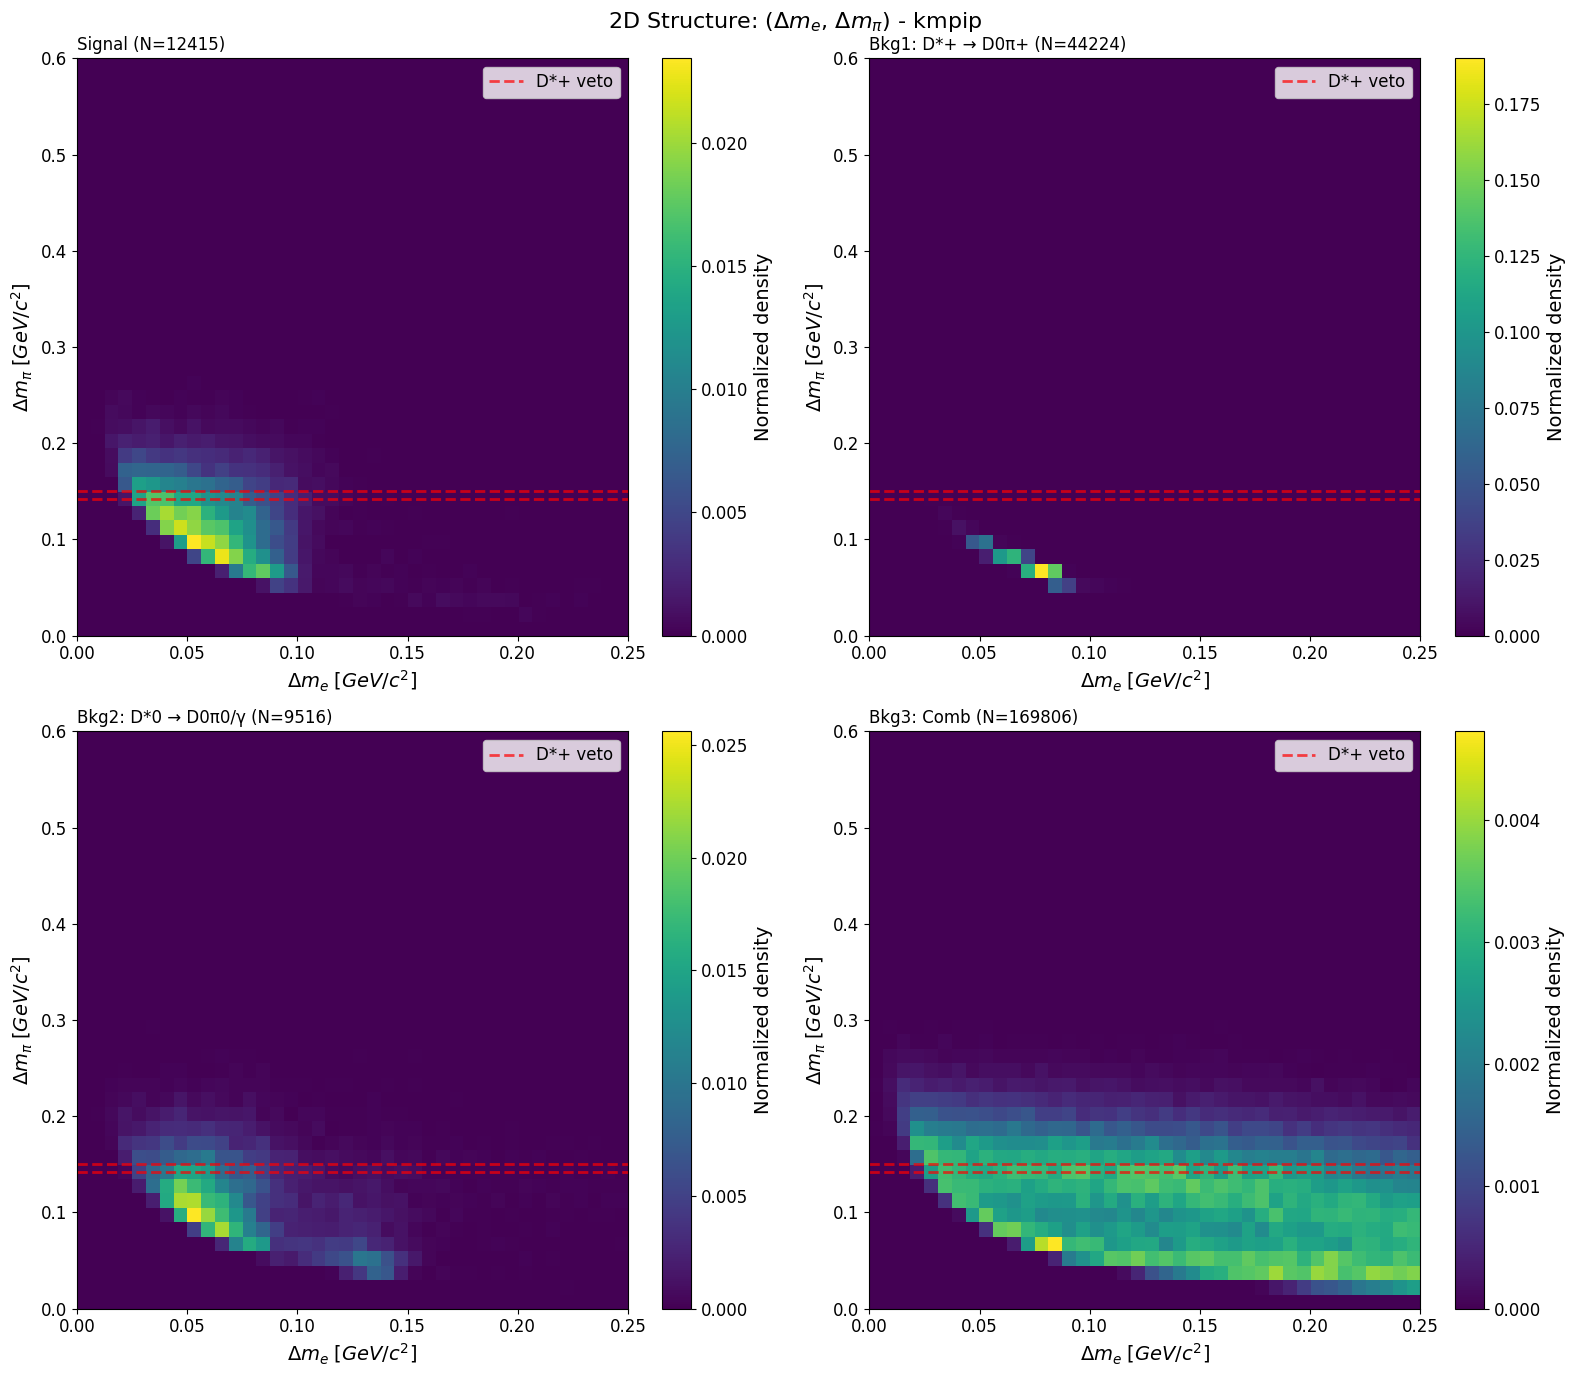


Stage 3 - 2D Structure - km3pi


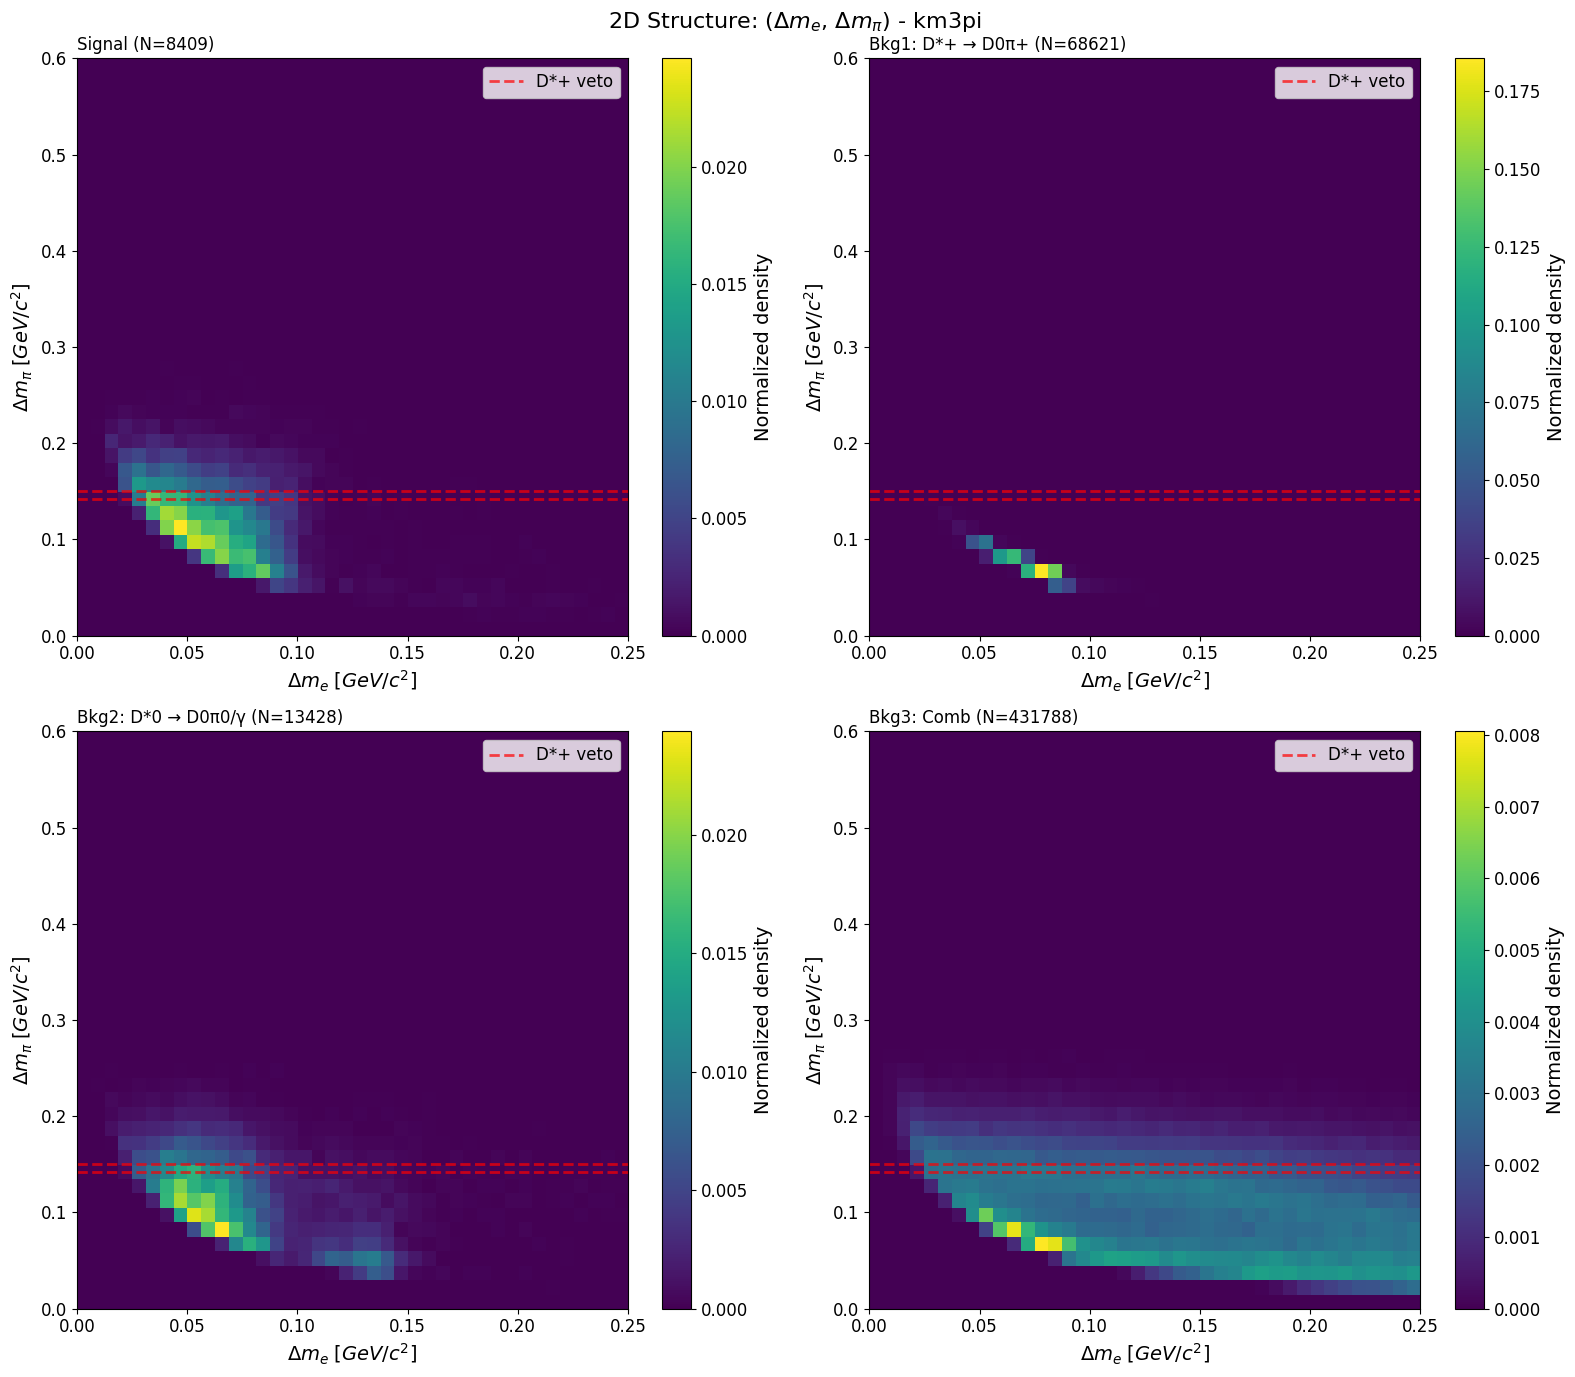


Stage 3 - 2D Structure - kmpippi0_eff20_May2020


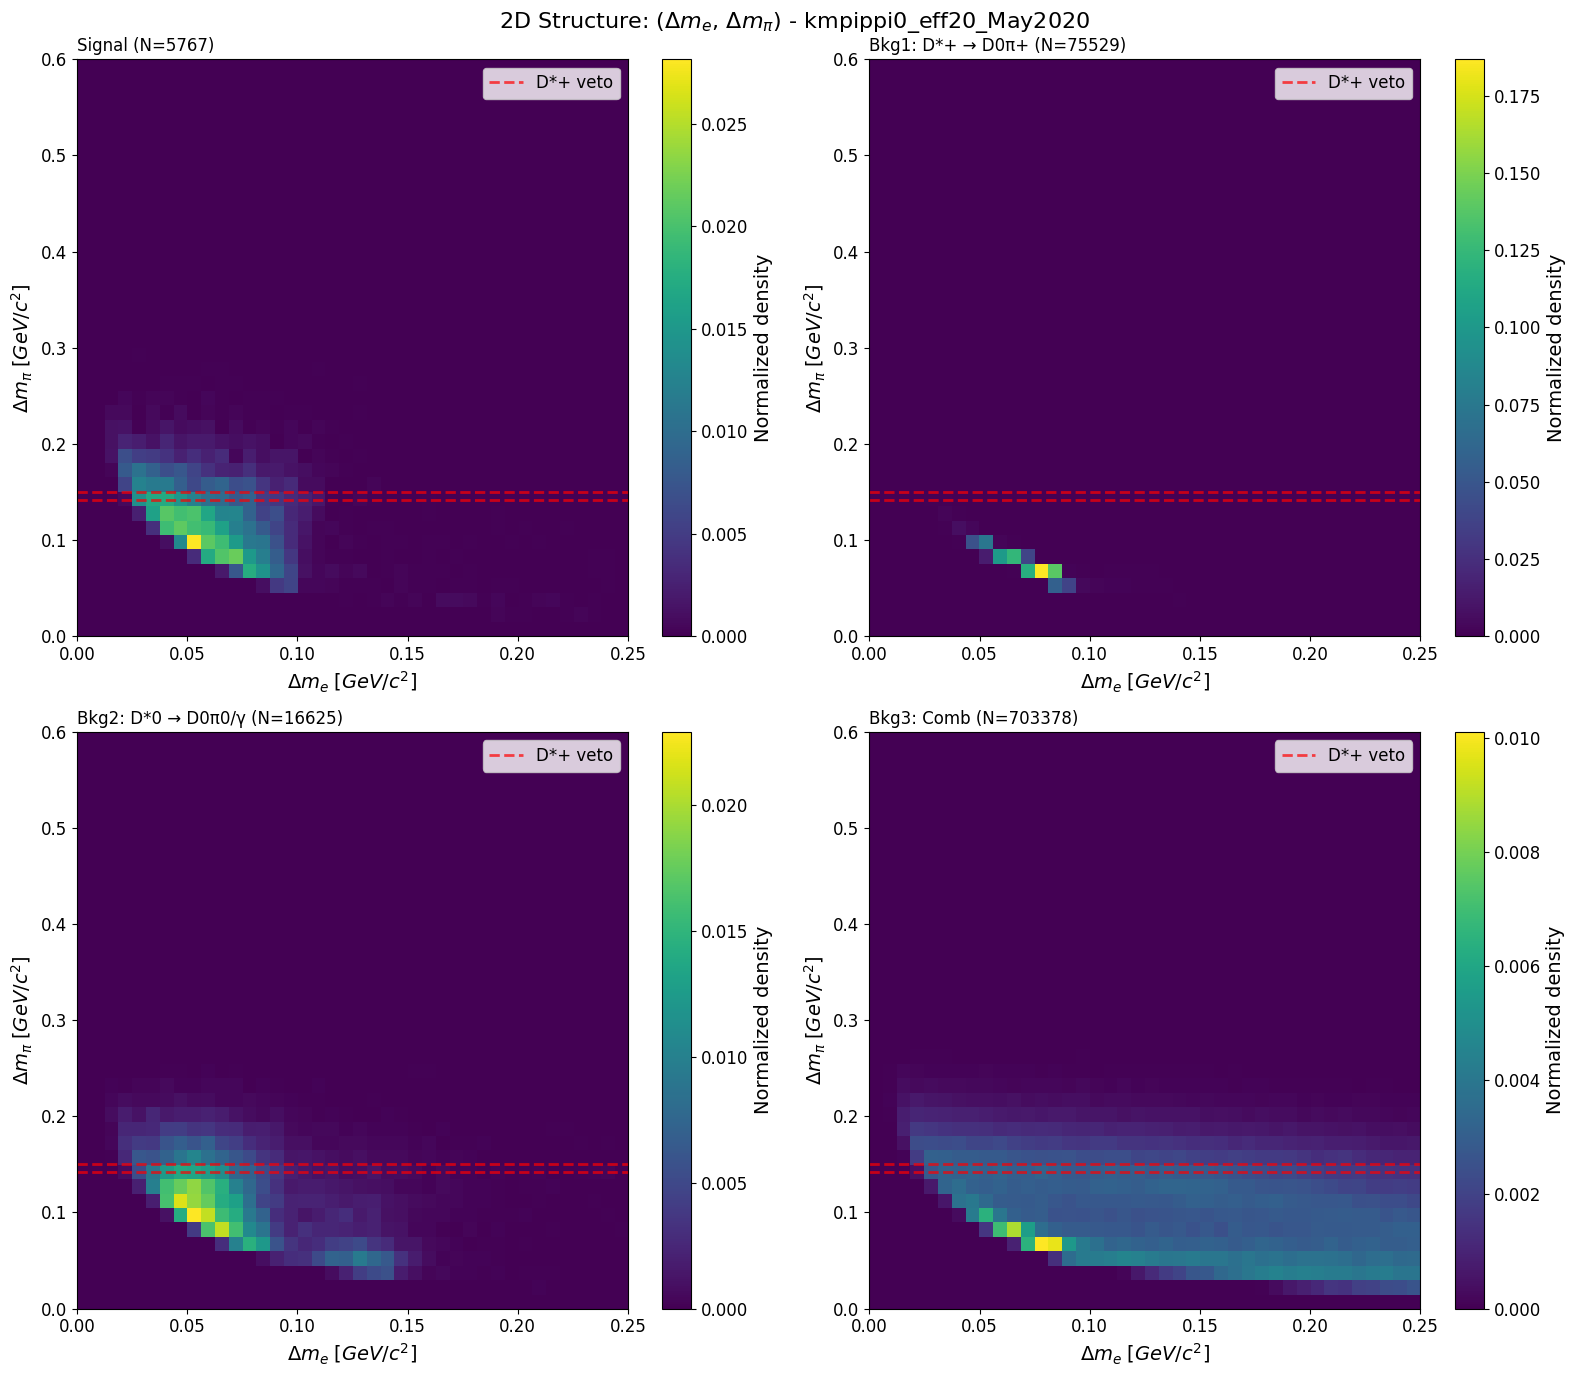

In [21]:
# Stage 3: Create Δm_shift variable and make 2D plots
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 3 - 2D Structure - {mode}")
    print('='*80)
    
    df_signal = DataFrames[f"Signal_{mode}"]
    df_signal = df_signal[df_signal['gammaveto_M_Correction'] >= dM]
    df_signal = df_signal[df_signal['Ds_isSignal'] == 1].copy()
    
    df_bkg = DataFrames[f"All_{mode}"]
    df_bkg = df_bkg[df_bkg['gammaveto_M_Correction'] >= dM].copy()
    
    # Calculate Δm_shift
    df_signal['Dm_shift'] = df_signal['Ds_diff_D0pi'] - df_signal['Ds_massDifference_0']
    df_bkg['Dm_shift'] = df_bkg['Ds_diff_D0pi'] - df_bkg['Ds_massDifference_0']
    
    # Define background categories based on toggle
    df_bkg1 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 413].copy()
    df_bkg2 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 423].copy()
    df_bkg3 = df_bkg[(abs(df_bkg['Ds_mcPDG']) != 413) & 
                     (abs(df_bkg['Ds_mcPDG']) != 423)].copy()
    
    # 2D histograms
    bins_2d = [40, 40]
    range_2d = [[0.0, 0.25], [0.0, 0.6]]
    
    datasets = {
        'Signal': df_signal,
        'Bkg1: D*+ → D0π+': df_bkg1,
        'Bkg2: D*0 → D0π0/γ': df_bkg2,
        'Bkg3: Comb': df_bkg3
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for idx, (name, df) in enumerate(datasets.items()):
        if len(df) == 0:
            continue
            
        H, xedges, yedges = np.histogram2d(
            df['Ds_massDifference_0'], 
            df['Dm_shift'],
            bins=bins_2d, 
            range=range_2d
        )
        
        # Normalize
        H = H / np.sum(H) if np.sum(H) > 0 else H
        
        im = axes[idx].imshow(H.T, origin='lower', aspect='auto', 
                             extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                             cmap='viridis', interpolation='nearest')
        
        # Mark D*+ veto region
        axes[idx].axhline(y=dstar_veto_min, color='red', linestyle='--', 
                         linewidth=2, alpha=0.7, label='D*+ veto')
        axes[idx].axhline(y=dstar_veto_max, color='red', linestyle='--', 
                         linewidth=2, alpha=0.7)
        
        axes[idx].set_xlabel(r'$\Delta m_e\;[GeV/c^{2}]$')
        axes[idx].set_ylabel(r'$\Delta m_\pi\;[GeV/c^{2}]$')
        axes[idx].set_title(f'{name} (N={len(df)})', loc='left')
        axes[idx].legend(loc='upper right')
        plt.colorbar(im, ax=axes[idx], label='Normalized density')
    
    plt.suptitle(f'2D Structure: ($\\Delta m_e$, $\\Delta m_\\pi$) - {mode}', fontsize=16)
    plt.tight_layout()
    plt.show()


Stage 3 - Δm_shift Projections - kmpip
Δm_e [0.00, 0.05]: Signal N=3881, Bkg1 N=3331, Bkg2 N=2108
Δm_e [0.05, 0.10]: Signal N=7939, Bkg1 N=40312, Bkg2 N=5411
Δm_e [0.10, 0.15]: Signal N=411, Bkg1 N=454, Bkg2 N=1684
Δm_e [0.15, 0.20]: Signal N=110, Bkg1 N=63, Bkg2 N=163


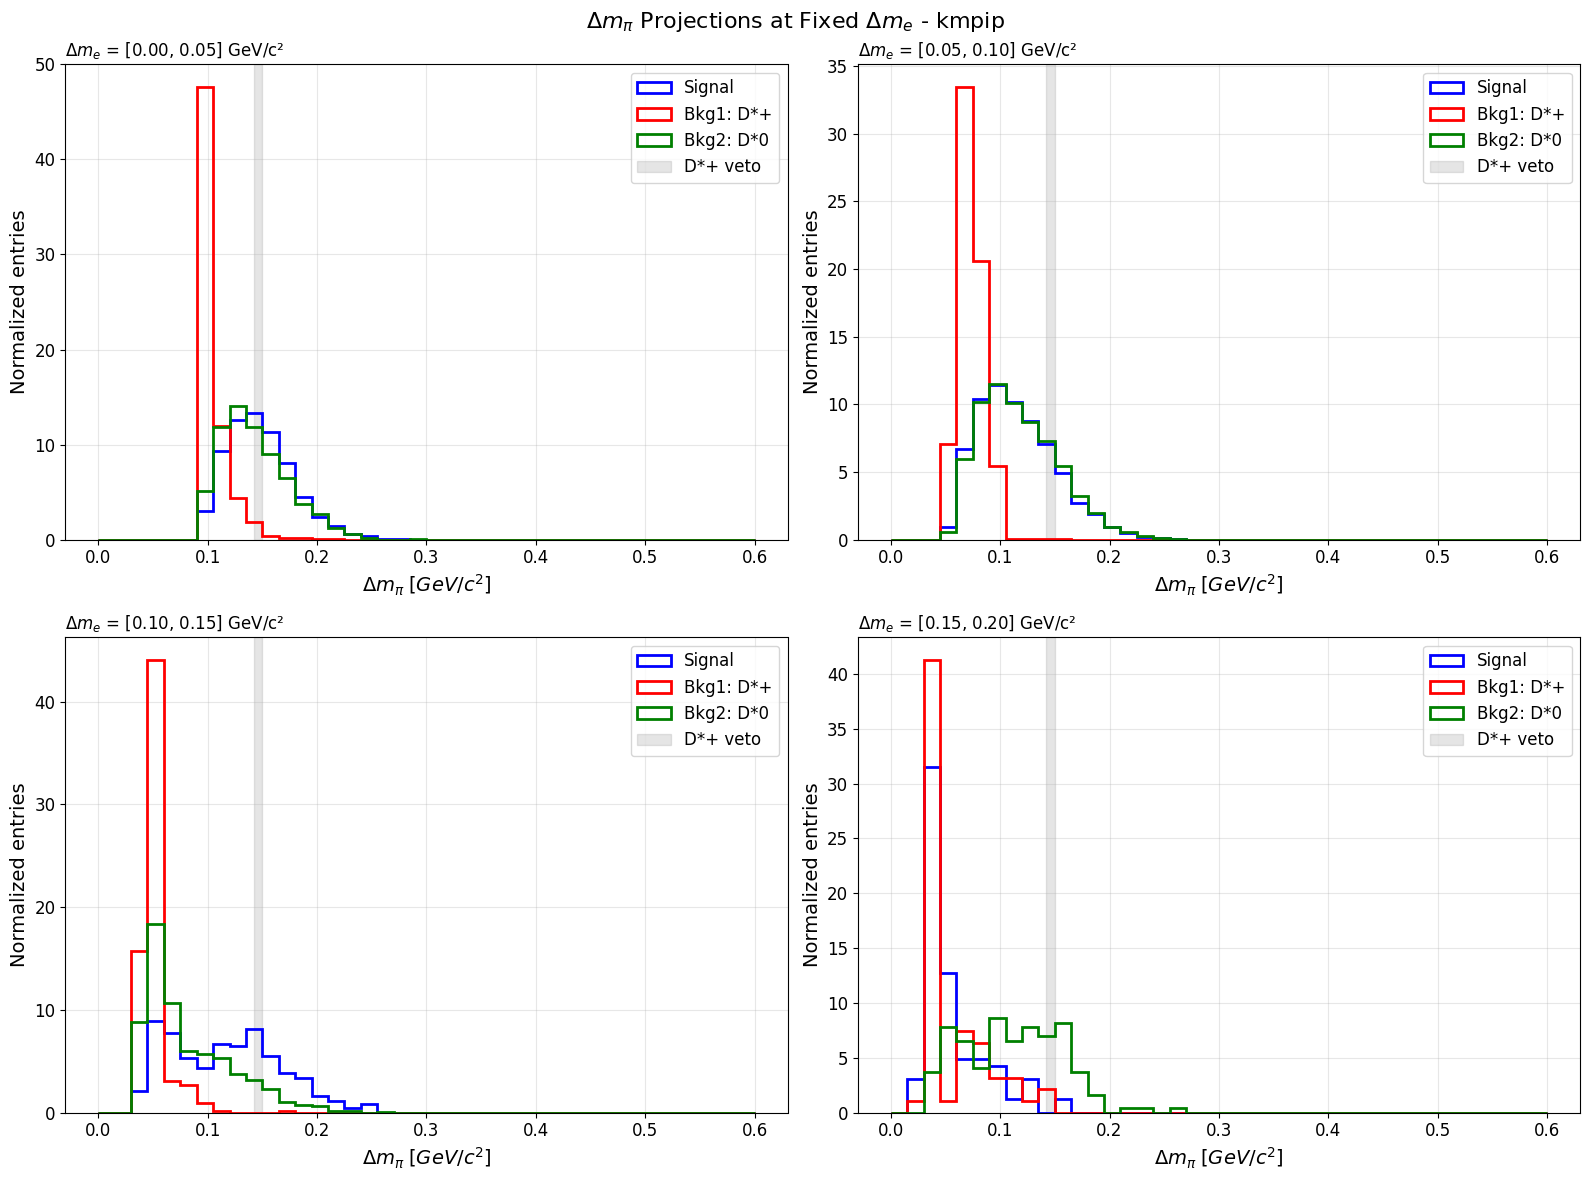


Stage 3 - Δm_shift Projections - km3pi
Δm_e [0.00, 0.05]: Signal N=2716, Bkg1 N=4738, Bkg2 N=3049
Δm_e [0.05, 0.10]: Signal N=5309, Bkg1 N=62461, Bkg2 N=7532
Δm_e [0.10, 0.15]: Signal N=270, Bkg1 N=1069, Bkg2 N=2374
Δm_e [0.15, 0.20]: Signal N=75, Bkg1 N=163, Bkg2 N=249


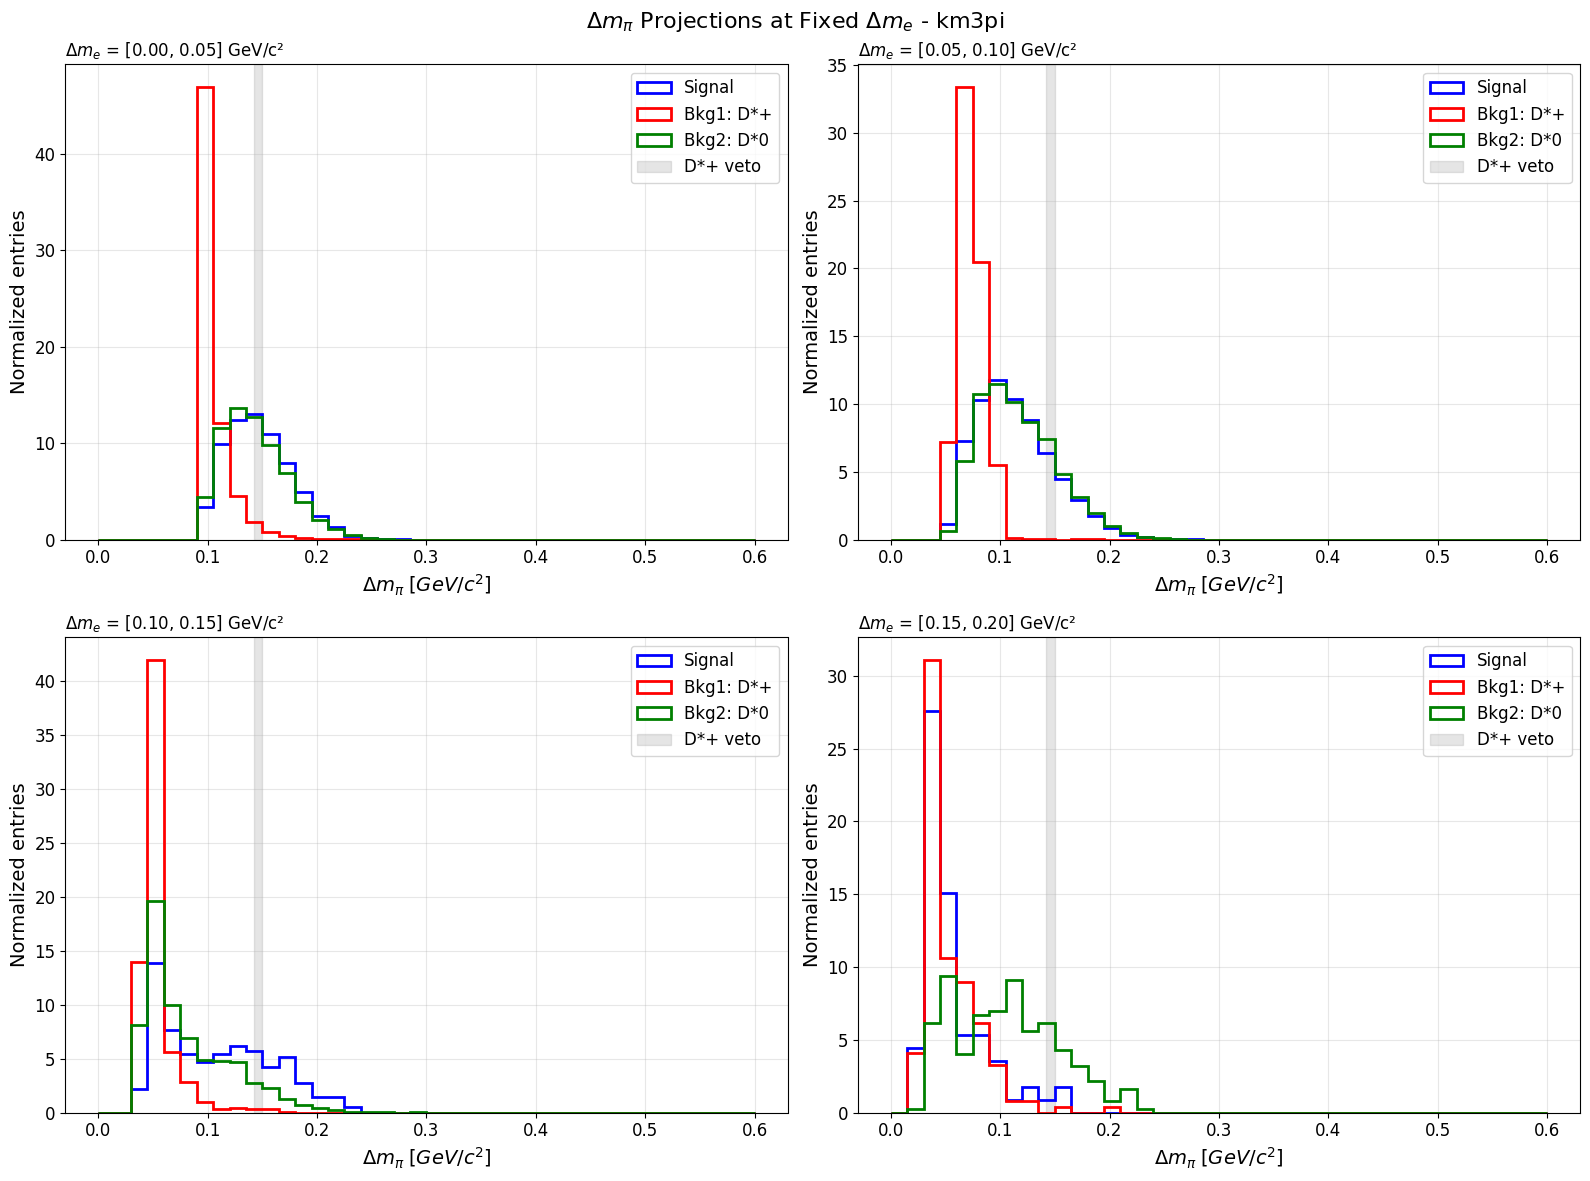


Stage 3 - Δm_shift Projections - kmpippi0_eff20_May2020
Δm_e [0.00, 0.05]: Signal N=1854, Bkg1 N=4984, Bkg2 N=3777
Δm_e [0.05, 0.10]: Signal N=3666, Bkg1 N=68468, Bkg2 N=9335
Δm_e [0.10, 0.15]: Signal N=174, Bkg1 N=1543, Bkg2 N=2872
Δm_e [0.15, 0.20]: Signal N=43, Bkg1 N=326, Bkg2 N=374


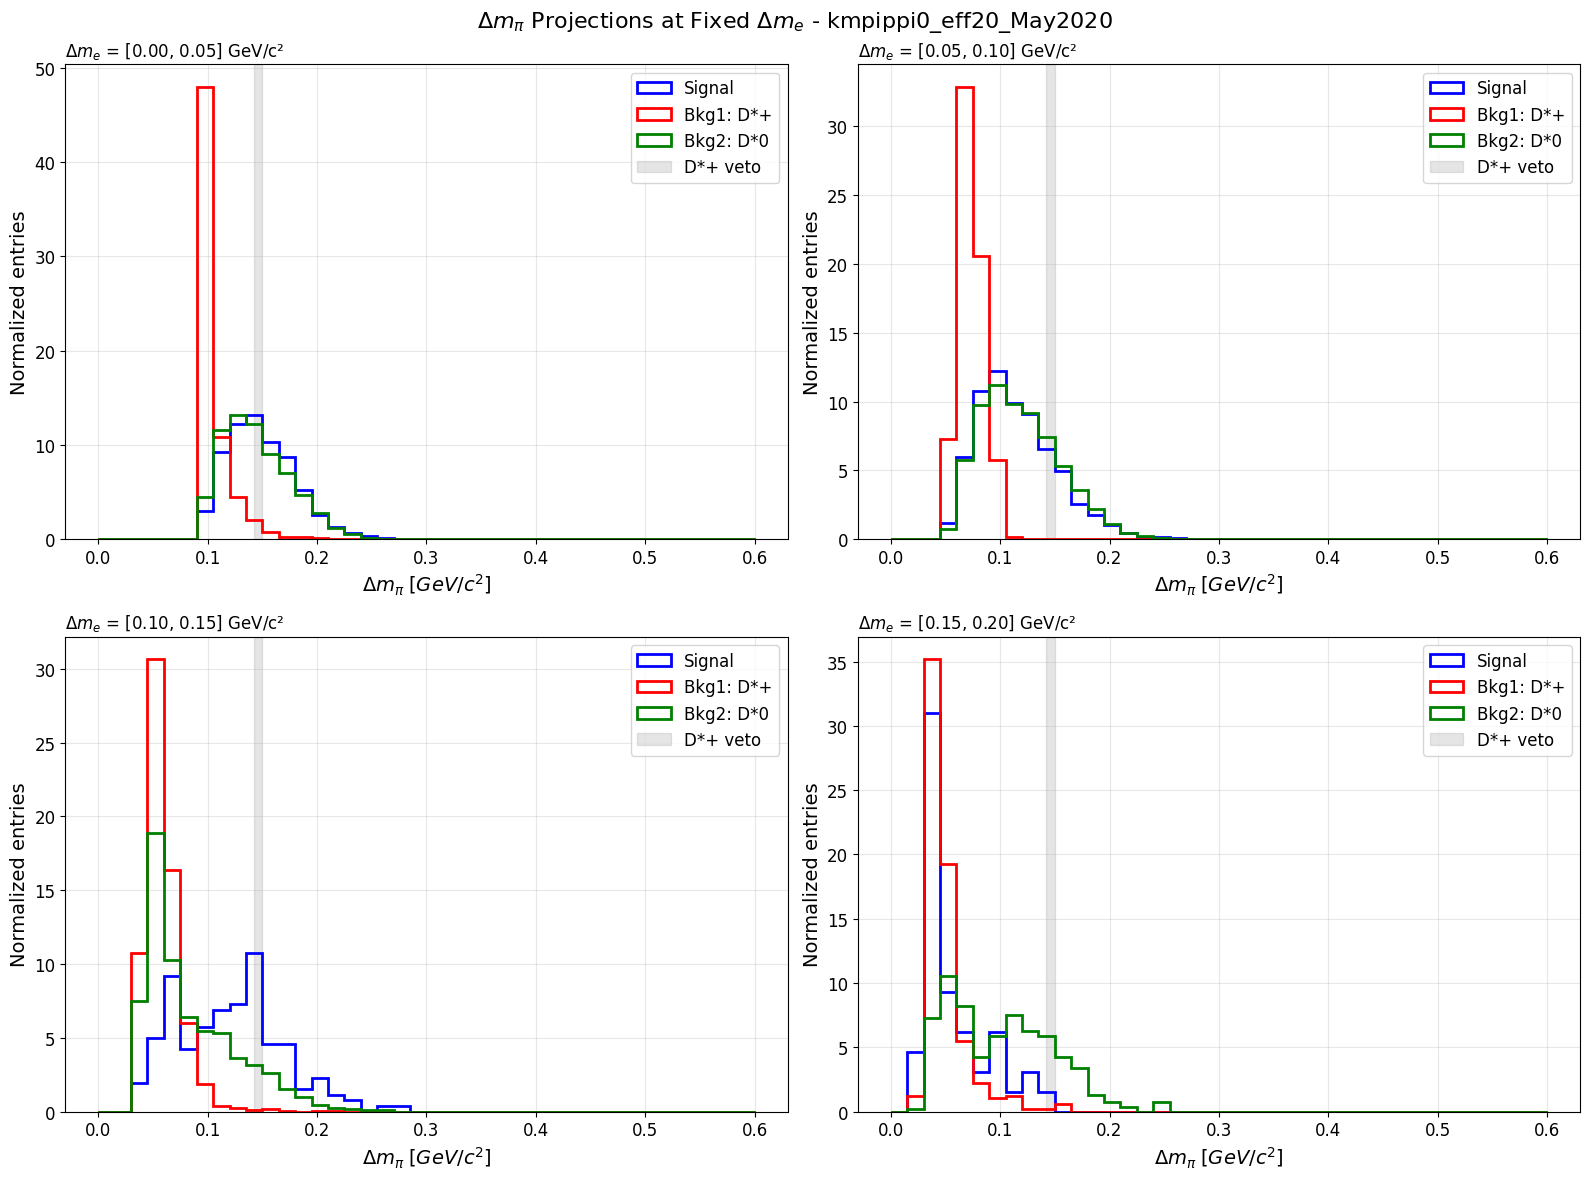

In [22]:
# Stage 3: Δm_shift projections at fixed Δm_e slices
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 3 - Δm_shift Projections - {mode}")
    print('='*80)
    
    df_signal = DataFrames[f"Signal_{mode}"]
    df_signal = df_signal[df_signal['gammaveto_M_Correction'] >= dM]
    df_signal = df_signal[df_signal['Ds_isSignal'] == 1].copy()
    
    df_bkg = DataFrames[f"All_{mode}"]
    df_bkg = df_bkg[df_bkg['gammaveto_M_Correction'] >= dM].copy()
    
    # Calculate Δm_shift
    df_signal['Dm_shift'] = df_signal['Ds_diff_D0pi'] - df_signal['Ds_massDifference_0']
    df_bkg['Dm_shift'] = df_bkg['Ds_diff_D0pi'] - df_bkg['Ds_massDifference_0']
    
    # Define background categories
    df_bkg1 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 413].copy()
    df_bkg2 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 423].copy()
    
    # Define Δm_e slices
    dm_e_slices = [(0.00, 0.05), (0.05, 0.10), (0.10, 0.15), (0.15, 0.20)]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, (dm_min, dm_max) in enumerate(dm_e_slices):
        ax = axes[idx]
        
        # Select Δm_e slice
        sig_slice = df_signal[(df_signal['Ds_massDifference_0'] >= dm_min) & 
                              (df_signal['Ds_massDifference_0'] < dm_max)]
        bkg1_slice = df_bkg1[(df_bkg1['Ds_massDifference_0'] >= dm_min) & 
                             (df_bkg1['Ds_massDifference_0'] < dm_max)]
        bkg2_slice = df_bkg2[(df_bkg2['Ds_massDifference_0'] >= dm_min) & 
                             (df_bkg2['Ds_massDifference_0'] < dm_max)]
        
        # Plot Δm_shift distributions
        bins = 40
        range_shift = [0.0, 0.6]
        
        ax.hist(sig_slice['Dm_shift'], bins=bins, range=range_shift, 
               histtype='step', linewidth=2, label='Signal', 
               color='blue', density=True)
        ax.hist(bkg1_slice['Dm_shift'], bins=bins, range=range_shift, 
               histtype='step', linewidth=2, label='Bkg1: D*+', 
               color='red', density=True)
        ax.hist(bkg2_slice['Dm_shift'], bins=bins, range=range_shift, 
               histtype='step', linewidth=2, label='Bkg2: D*0', 
               color='green', density=True)
        
        # Mark D*+ veto
        ax.axvspan(dstar_veto_min, dstar_veto_max, alpha=0.2, 
                  color='gray', label='D*+ veto')
        
        ax.set_xlabel(r'$\Delta m_\pi\;[GeV/c^{2}]$')
        ax.set_ylabel('Normalized entries')
        ax.set_title(f'$\\Delta m_e$ = [{dm_min:.2f}, {dm_max:.2f}] GeV/c²', 
                    loc='left')
        ax.legend()
        ax.grid(alpha=0.3)
        
        print(f"Δm_e [{dm_min:.2f}, {dm_max:.2f}]: Signal N={len(sig_slice)}, "
              f"Bkg1 N={len(bkg1_slice)}, Bkg2 N={len(bkg2_slice)}")
    
    plt.suptitle(f'$\\Delta m_\\pi$ Projections at Fixed $\\Delta m_e$ - {mode}', 
                fontsize=16)
    plt.tight_layout()
    plt.show()

 ## Stage 3 Summary: Correlation Analysis

In [23]:
# Calculate correlation between Δm_e and Δm_π for each category
for mode in decay_config.keys():
    print(f"\n{'='*80}")
    print(f"Stage 3 - Correlation Analysis - {mode}")
    print('='*80)
    
    df_signal = DataFrames[f"Signal_{mode}"]
    df_signal = df_signal[df_signal['gammaveto_M_Correction'] >= dM]
    df_signal = df_signal[df_signal['Ds_isSignal'] == 1]
    
    df_bkg = DataFrames[f"All_{mode}"]
    df_bkg = df_bkg[df_bkg['gammaveto_M_Correction'] >= dM]
    
    df_bkg1 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 413]
    df_bkg2 = df_bkg[abs(df_bkg['Ds_mcPDG']) == 423]
    df_bkg3 = df_bkg[(abs(df_bkg['Ds_mcPDG']) != 413) & 
                     (abs(df_bkg['Ds_mcPDG']) != 423)]
    
    datasets = {
        'Signal': df_signal,
        'Bkg1: D*+ → D0π+': df_bkg1,
        'Bkg2: D*0 → D0π0/γ': df_bkg2,
        'Bkg3: Comb': df_bkg3
    }
    
    for name, df in datasets.items():
        if len(df) > 0:
            corr = df[['Ds_massDifference_0', 'Ds_diff_D0pi']].corr().iloc[0, 1]
            print(f"{name:25s}: correlation(Δm_e, Δm_π) = {corr:.4f}")


Stage 3 - Correlation Analysis - kmpip
Signal                   : correlation(Δm_e, Δm_π) = 0.3271
Bkg1: D*+ → D0π+         : correlation(Δm_e, Δm_π) = -0.9691
Bkg2: D*0 → D0π0/γ       : correlation(Δm_e, Δm_π) = 0.6011
Bkg3: Comb               : correlation(Δm_e, Δm_π) = 0.5981

Stage 3 - Correlation Analysis - km3pi
Signal                   : correlation(Δm_e, Δm_π) = 0.2447
Bkg1: D*+ → D0π+         : correlation(Δm_e, Δm_π) = -0.7103
Bkg2: D*0 → D0π0/γ       : correlation(Δm_e, Δm_π) = 0.5985
Bkg3: Comb               : correlation(Δm_e, Δm_π) = 0.6408

Stage 3 - Correlation Analysis - kmpippi0_eff20_May2020
Signal                   : correlation(Δm_e, Δm_π) = 0.2621
Bkg1: D*+ → D0π+         : correlation(Δm_e, Δm_π) = 0.6764
Bkg2: D*0 → D0π0/γ       : correlation(Δm_e, Δm_π) = 0.5974
Bkg3: Comb               : correlation(Δm_e, Δm_π) = 0.7982
